In [1]:
import numpy as np                           #Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Reading CSV File

In [2]:
df = pd.read_csv('Superstore.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
df.head()                                  #Getting a general idea about the dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9994
Number of columns: 21


In [5]:
df.info()                            #Infromation about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
def colDetails():
  '''User defined function for showing value counts of each column'''
  for i in df.columns:
      x = df[i].value_counts()
      print("Column name is:",i,"and its values are:\n",x)
colDetails()

Column name is: Row ID and its values are:
 1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: Row ID, Length: 9994, dtype: int64
Column name is: Order ID and its values are:
 CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64
Column name is: Order Date and its values are:
 9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
              ..
2/25/2016      1
10/25/2016     1
2/21/2014      1
10/18/2016     1
1/21/2014      1
Name: Order Date, Length: 1237, dtype: int64
Column name is: Ship Date and its values are:
 12/16/2015    35
9/26/2017     34
12/6/2017     32
11/21/2017    32
9/6/2017      30
              ..
3/4/2014       1
2/11/2017      1
8/7/2016       1
4/8/2

## Data preprocessing

Checking for NULL values

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No NULL values in the dataset

Checking for duplicate tuples

In [8]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


As the 'Row ID' is unique for each row maybe this is preventing from detecting duplicate rows.Let us drop the 'Row ID' column.

In [9]:
df.drop(['Row ID'],axis=1,inplace=True)

In [10]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


After dropping the 'Row ID' column, we see that there are duplicate rows. Let us drop them.

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9993
Number of columns: 20


Converting 'Order Date' and 'Ship Date' columns to [day,month,year] columns

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [14]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

In [15]:
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Day of Week'] = df['Ship Date'].dt.dayofweek

In [16]:
df.drop(['Order Date','Ship Date'],axis=1,inplace=True)

In [17]:
df.info()                         #Infromation about the pre-processed dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           9993 non-null   object 
 1   Ship Mode          9993 non-null   object 
 2   Customer ID        9993 non-null   object 
 3   Customer Name      9993 non-null   object 
 4   Segment            9993 non-null   object 
 5   Country            9993 non-null   object 
 6   City               9993 non-null   object 
 7   State              9993 non-null   object 
 8   Postal Code        9993 non-null   int64  
 9   Region             9993 non-null   object 
 10  Product ID         9993 non-null   object 
 11  Category           9993 non-null   object 
 12  Sub-Category       9993 non-null   object 
 13  Product Name       9993 non-null   object 
 14  Sales              9993 non-null   float64
 15  Quantity           9993 non-null   int64  
 16  Discount           9993 

In [18]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9993
Number of columns: 24


##**EDA**

### Which category of the product has the highest profit?

In [19]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_category, x='Category',
             y='Profit',
             text='Profit',
             title='Profit Analysis by Category')
fig.update_layout(title_text='Profit Analysis by Category', title_x=0.5)

fig.update_layout(xaxis_title='Category', yaxis_title='Total Profit')

fig.show()

#### Findings:
#### Technology category has the highest profit among all three categories i.e 145.459k

### Which year had the highest net profit?

In [20]:
profit_per_year = df.groupby('Order Year')['Profit'].sum().reset_index()
fig = px.bar(profit_per_year, x='Order Year',
             y='Profit',
             text='Profit',
             title='Net Profit Analysis per Year')
fig.update_layout(title_text='Net Profit Analysis per Year', title_x=0.5)

fig.update_layout(xaxis_title='Order Year', yaxis_title='Net Profit')

fig.show()


#### Findings:
#### In year 2017, the net profit was highest i.e 93.439k.

### Which year had the highest profit in the Office Supplies category of product ?

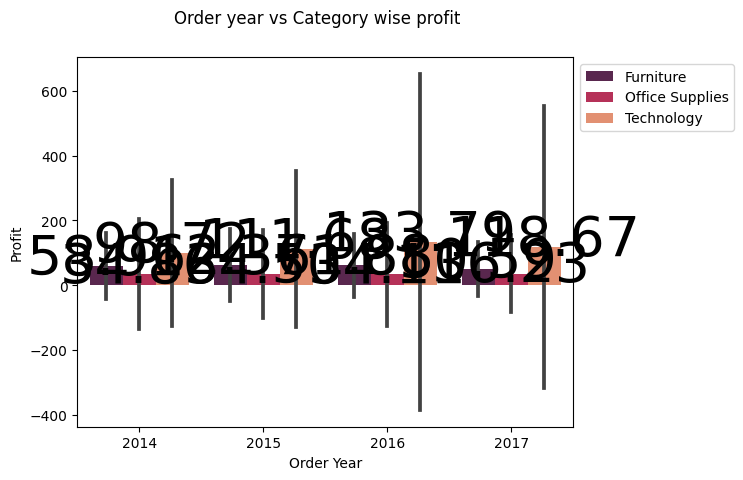

In [21]:
kf=df[df['Profit']>0]
profit_per_year=kf.groupby(['Order Year', 'Category'])['Profit'].sum().reset_index()


ax = sns.barplot(data=kf, x="Order Year", y="Profit", errorbar='sd', estimator=np.mean, hue='Category', palette='rocket')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=40)

plt.suptitle('Order year vs Category wise profit')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Findings:
#### Year 2017 had the highest profit in office supplies category of products.

### Which year had the highest loss in the Technology category of product ?

<ipython-input-22-23412fd71a86>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



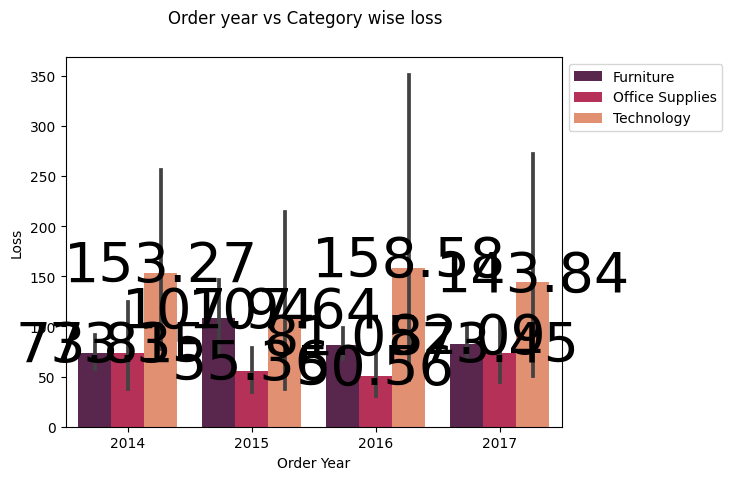

In [22]:
lf=df[df['Profit']<0]
lf['Loss']=lf['Profit']*-1

ax = sns.barplot(data=lf, x="Order Year", y="Loss", hue='Category', palette='rocket')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=40)

plt.suptitle('Order year vs Category wise loss')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Findings:
#### Year 2016 had the highest loss in Technology category of products.

### Which mode of shipping was used the most?

In [23]:
import plotly.graph_objects as go
p=df['Ship Mode'].value_counts()
labels =  ["Standard Class","Second Class","First Class","Same Day"]
values = [p[0],p[1],p[2],p[3]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.2, 0])])
fig.update_layout(
    title_text="Different Shipping Modes",title_x=0.5,

annotations=[dict(text='SHIP_MODE', x=0.5, y=0.5, font_size=13, showarrow=False)])
fig.show()

#### Findings:
#### Standard class mode has been used the most  for shipping of products i.e 59.7% of usage.

### Which segment had the highest number of orders?

In [24]:
import plotly.graph_objects as go
v=df['Segment'].value_counts()
labels =  ["Consumer","Corporate","Home Office"]
values = [v[0],v[1],v[2]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.2])])
fig.update_layout(
    title_text="Different Segments from where order have been placed",title_x=0.5,
    annotations=[dict(text='SEGMENT', x=0.5, y=0.5, font_size=13, showarrow=False)])
fig.show()

#### Findings:
#### Consumer segment had the highest number of order i.e 51.9%

### In which year did the consumer segment have the lowest average sales?

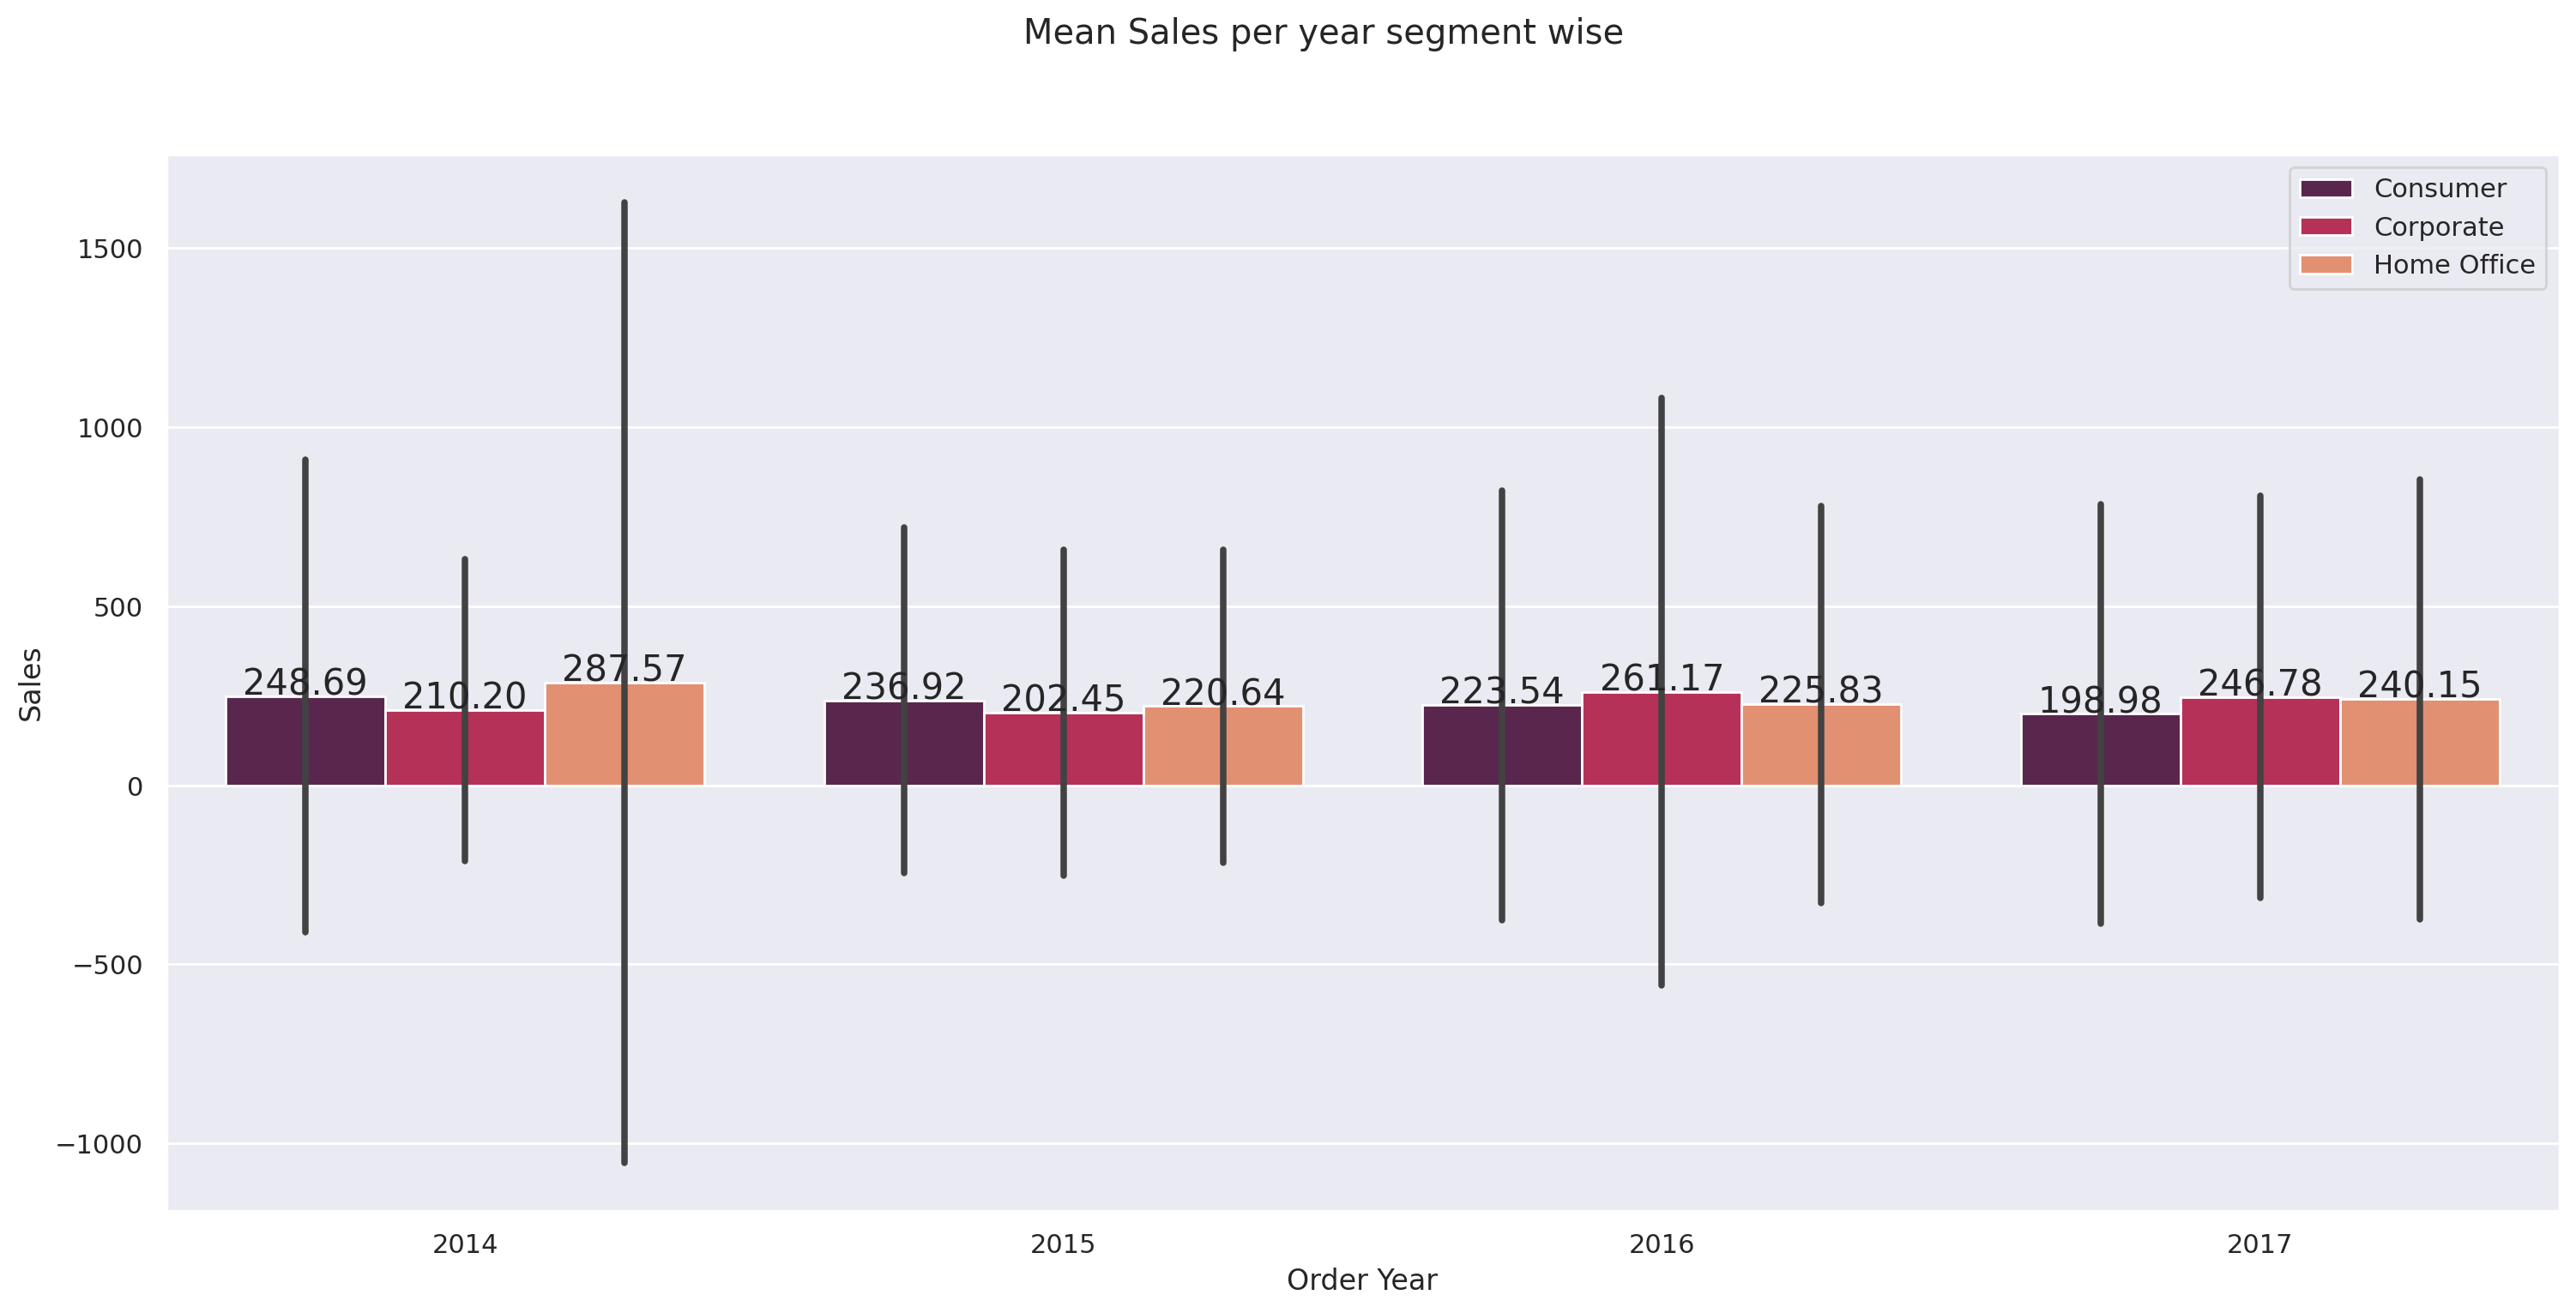

In [25]:
plt.figure(figsize=(18, 8), dpi=200)
sns.set(style='darkgrid')

ax = sns.barplot(x='Order Year', y='Sales', data=df, estimator=np.mean, errorbar='sd', hue='Segment', palette='rocket')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=15)

plt.suptitle('Mean Sales per year segment wise')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


#### Findings:
#### In year 2017, consumer segment have the lowest average sales.

### Which category of product have been ordered least by consumer segment?

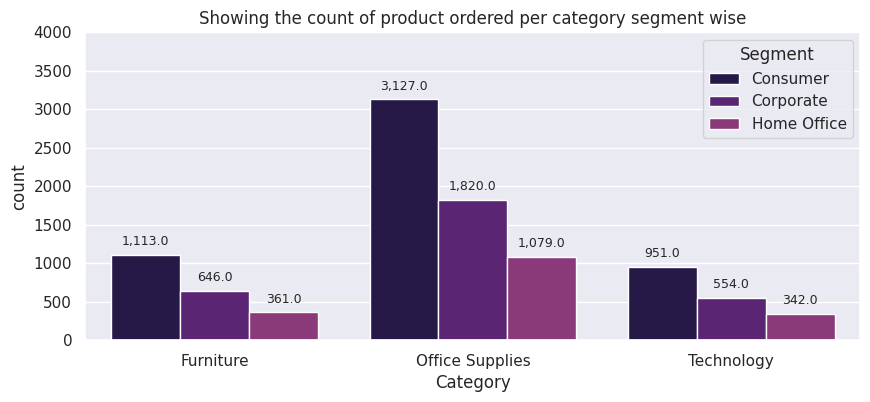

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.set_palette('magma')

ax = sns.countplot(data=df, x='Category', hue='Segment')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=9)

plt.title('Showing the count of product ordered per category segment wise')
plt.ylim(0, 4000)
plt.legend(title='Segment', bbox_to_anchor=(1, 1))
plt.show()


#### Findings:
#### Technology category of product have been ordered least by the consumer segment.

In [27]:
df.corr()           #Correlation between the columns

<ipython-input-27-7870fbc42697>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Postal Code,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
Postal Code,1.000000,-0.023851,0.012731,0.058471,-0.029968,0.026193,0.004242,0.002248,0.022007,0.004967,0.000447
Sales,-0.023851,1.000000,0.200808,-0.028197,0.479067,-0.000615,-0.009667,-0.009339,0.003119,-0.010803,0.038472
Quantity,0.012731,0.200808,1.000000,0.008680,0.066241,0.023264,-0.005934,-0.002145,0.027577,-0.006841,0.022117
Discount,0.058471,-0.028197,0.008680,1.000000,-0.219481,-0.004855,-0.002556,0.015381,-0.007967,-0.002171,-0.012354
Profit,-0.029968,0.479067,0.066241,-0.219481,1.000000,-0.000522,0.004644,0.000191,-0.000970,0.004505,0.021823
Order Month,0.026193,-0.000615,0.023264,-0.004855,-0.000522,1.000000,-0.020364,0.010805,0.911871,-0.003085,0.002143
Order Year,0.004242,-0.009667,-0.005934,-0.002556,0.004644,-0.020364,1.000000,0.052352,-0.006333,0.994082,-0.043889
Order Day of Week,0.002248,-0.009339,-0.002145,0.015381,0.000191,0.010805,0.052352,1.000000,0.017331,0.049746,-0.137413
Ship Month,0.022007,0.003119,0.027577,-0.007967,-0.000970,0.911871,-0.006333,0.017331,1.000000,-0.033590,0.011888
Ship Year,0.004967,-0.010803,-0.006841,-0.002171,0.004505,-0.003085,0.994082,0.049746,-0.033590,1.000000,-0.045031


### Which attribute is highly dependent on Sales?

<ipython-input-28-cd71d9d7531a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

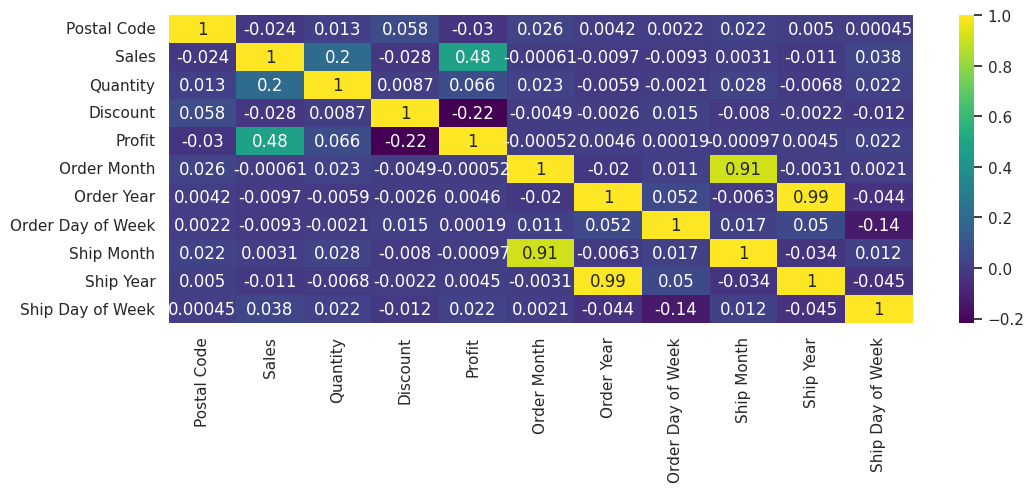

In [28]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),cmap="viridis",annot=True)          #heatmap

#### Findings:
#### Profit is highly dependent on sales i.e 0.48 in correlation table.

### In which category did the corporate segment have the highest average sales?

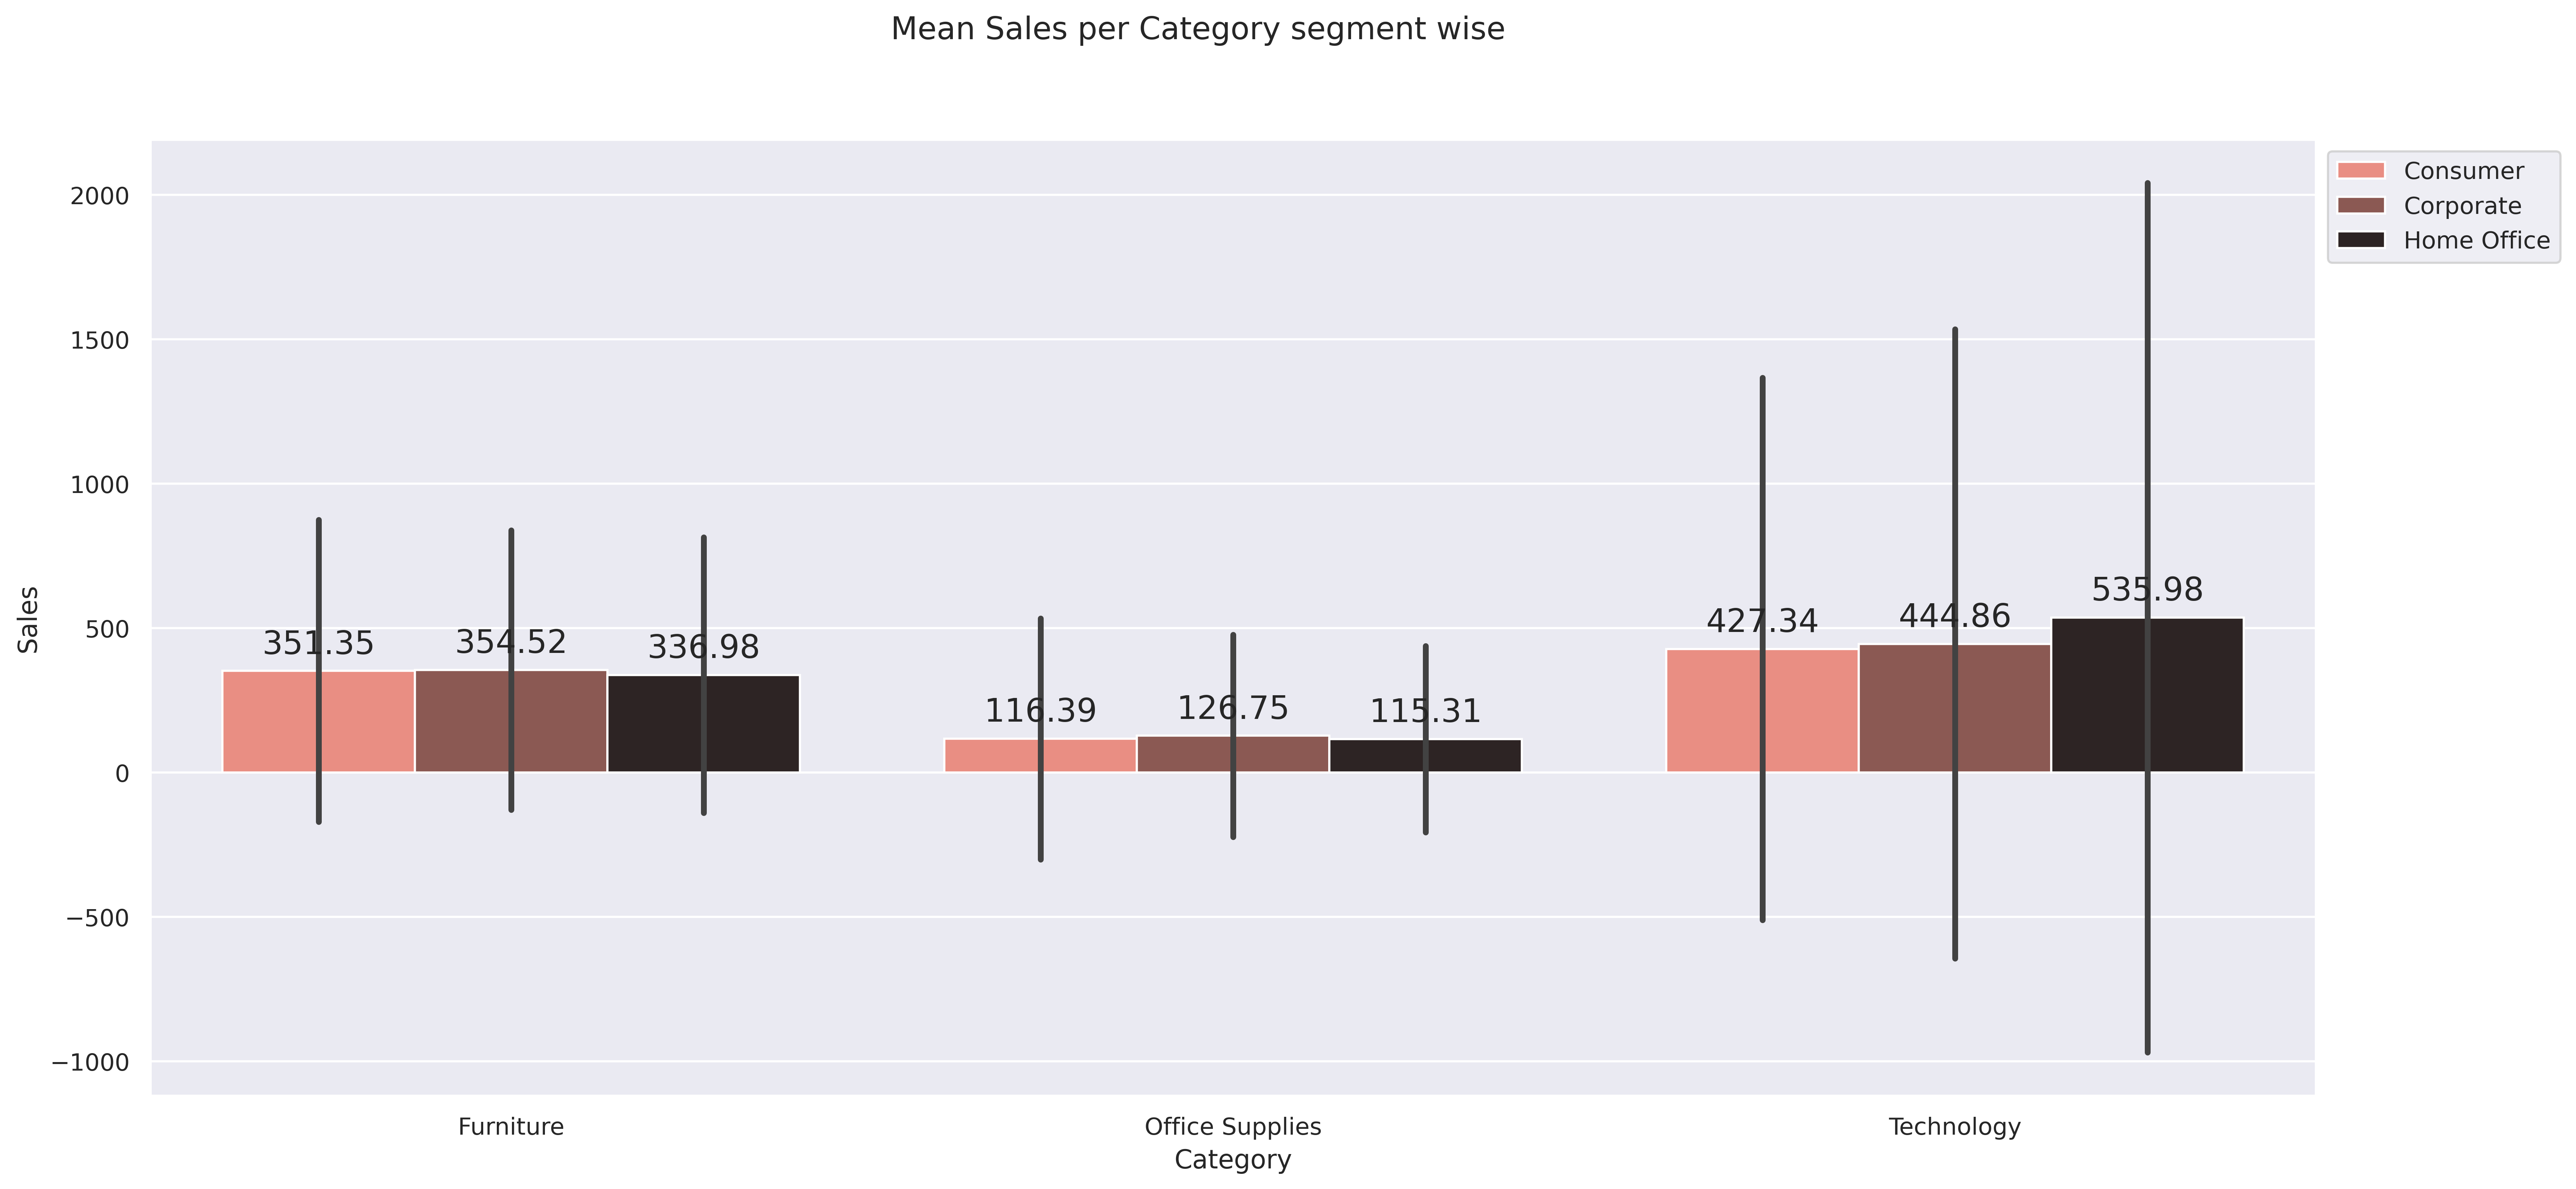

In [29]:
plt.figure(figsize=(18, 8), dpi=400)
sns.set(style='darkgrid')

ax = sns.barplot(x='Category', y='Sales', data=df, estimator=np.mean, errorbar='sd', hue='Segment', palette='dark:salmon_r')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ',.2f'),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=15)

plt.suptitle('Mean Sales per Category segment wise')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Findings:
#### In technology category, corporate segment have the highest average sales.


### In which year did the technology category of product have the lowest average sales?

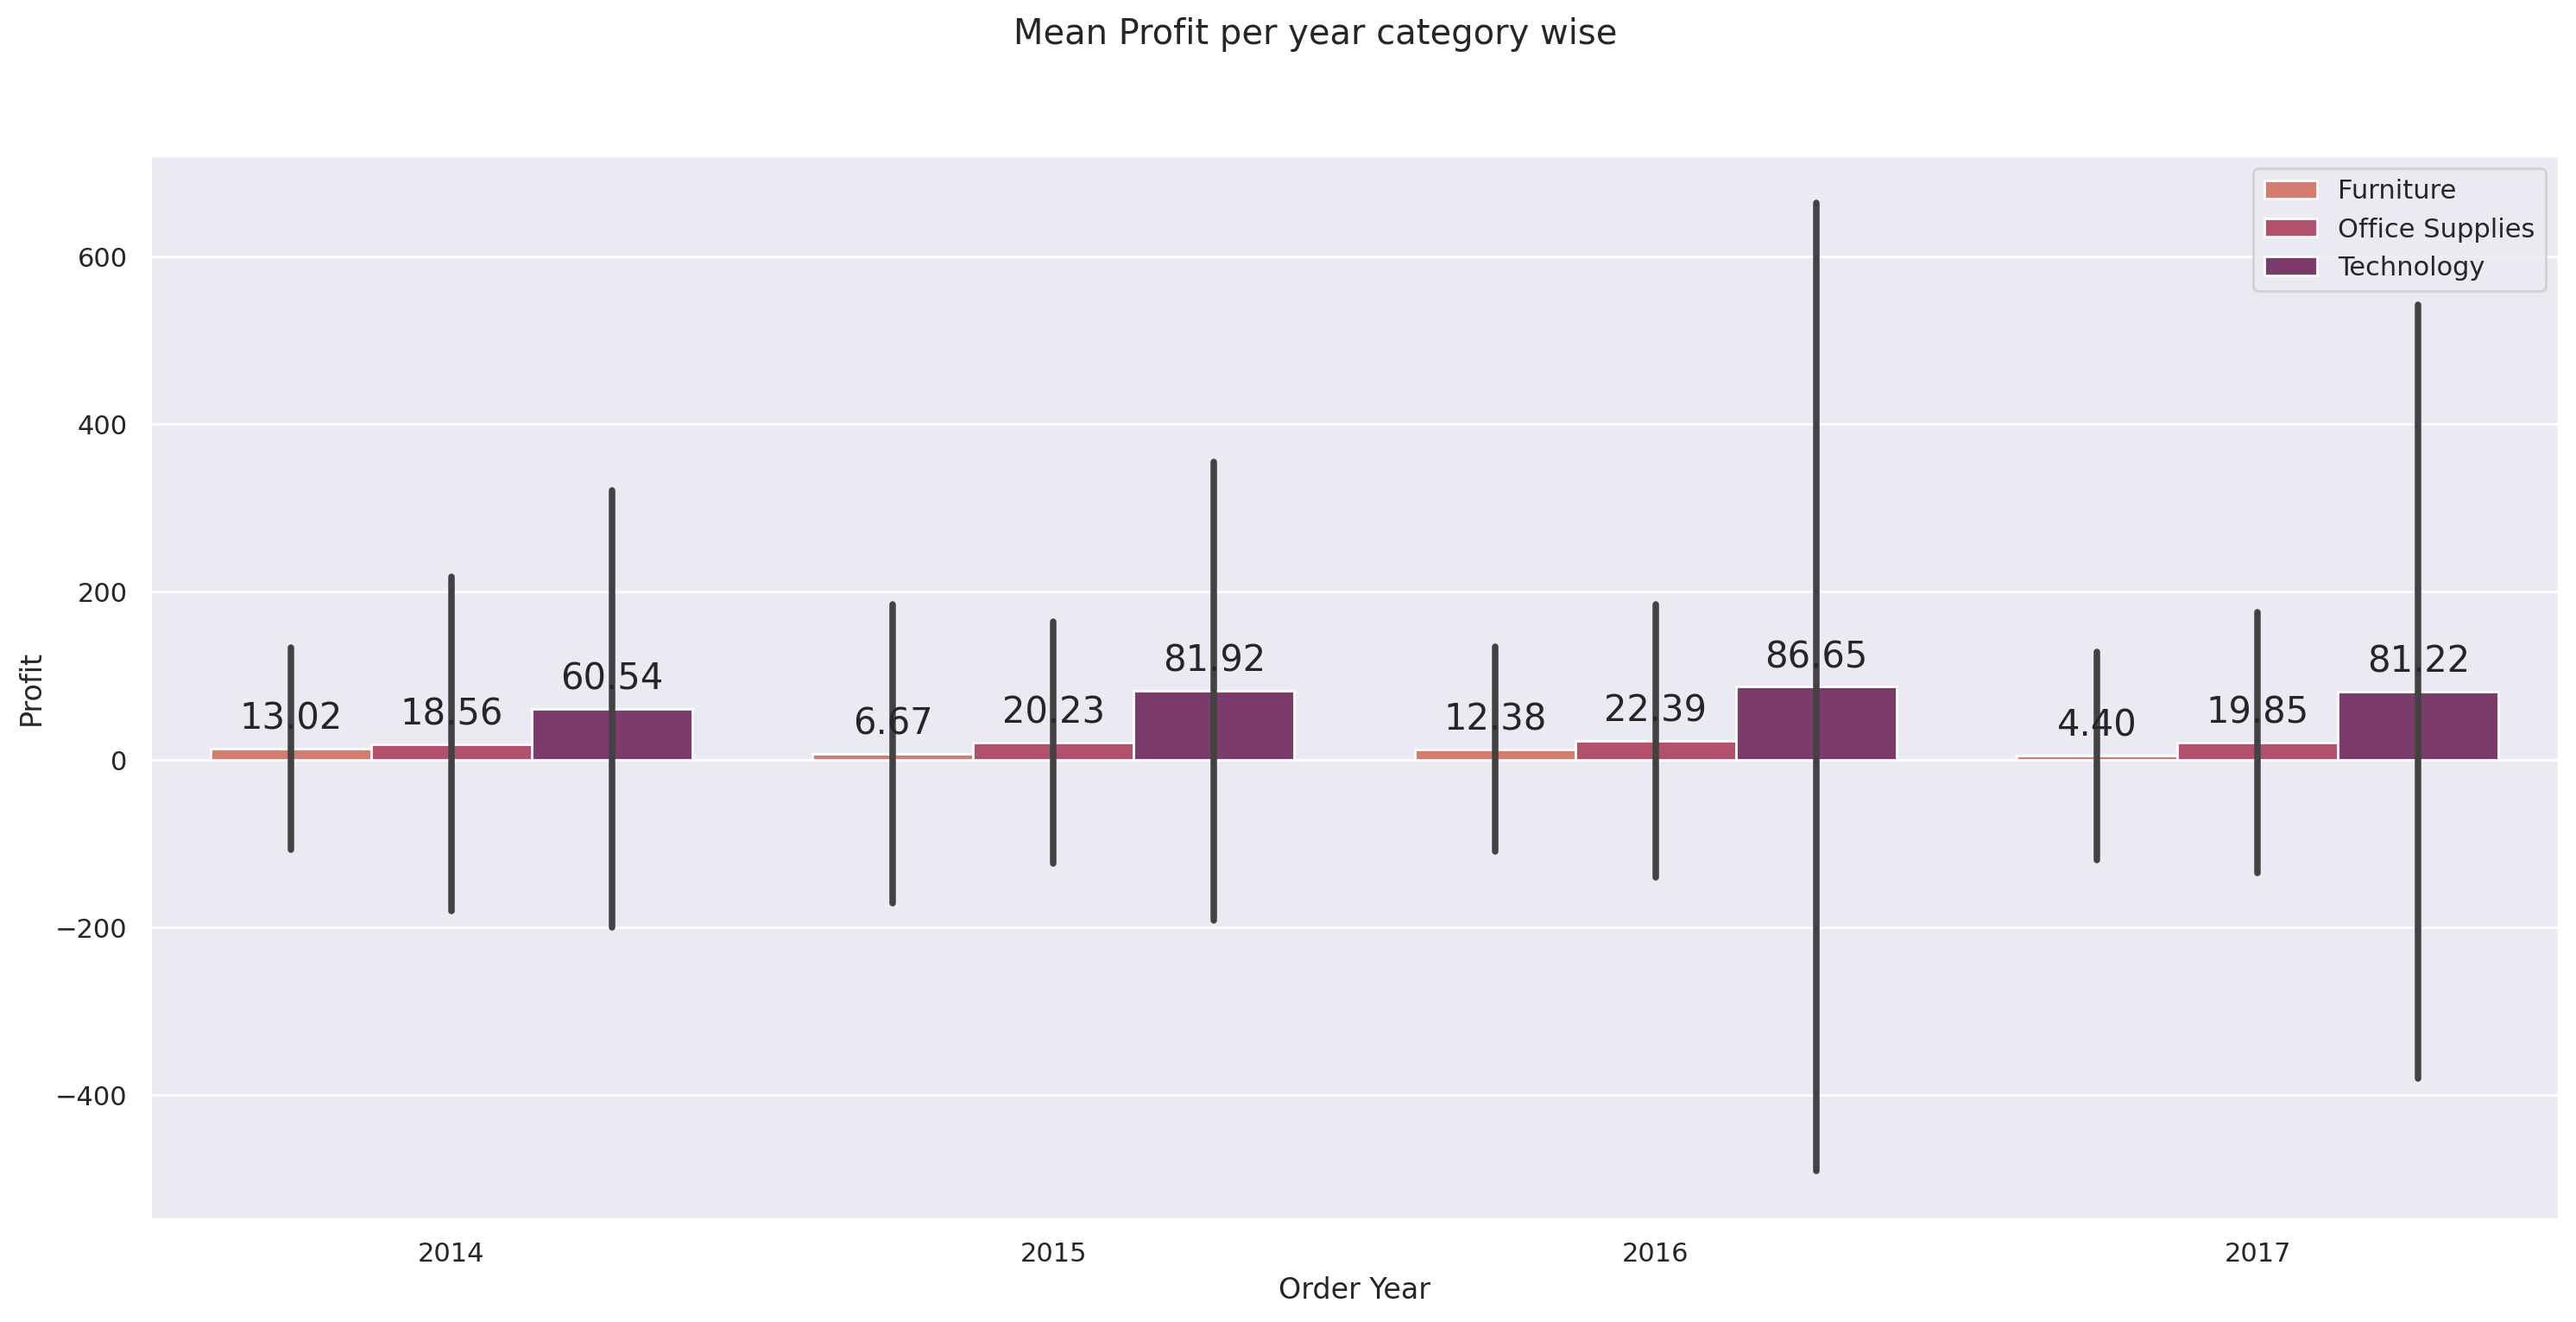

In [30]:
plt.figure(figsize=(18, 8), dpi=200)
sns.set(style='darkgrid')

ax = sns.barplot(x='Order Year', y='Profit', data=df, estimator=np.mean, errorbar='sd', hue='Category', palette='flare')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ',.2f'),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=15)

plt.suptitle('Mean Profit per year category wise')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


#### Findings:
#### In year 2014, the technology category of product have the lowest mean sales.

### Which sub-category of product have been ordered most?

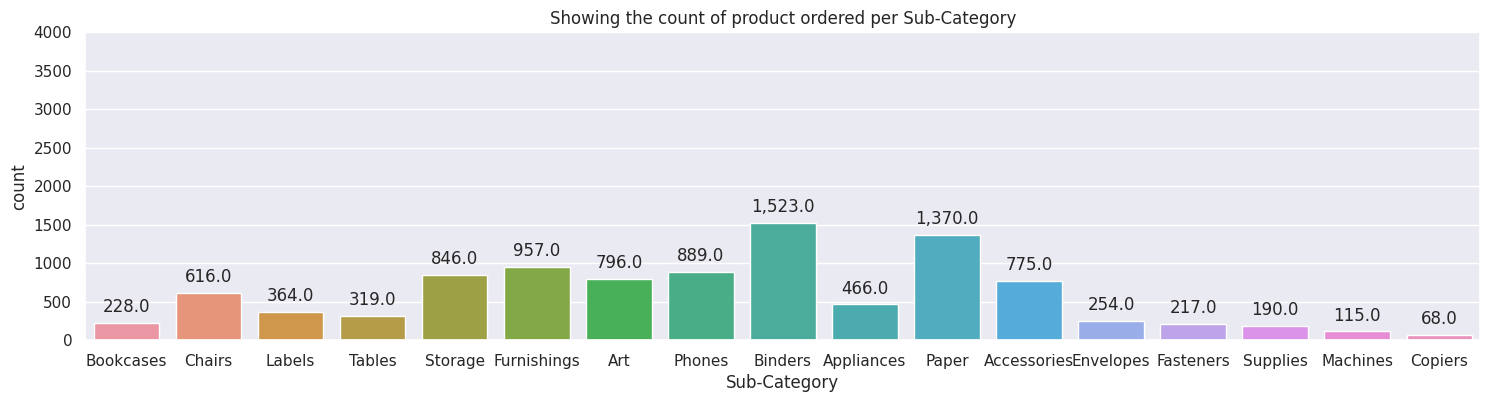

In [31]:
plt.figure(figsize=(18, 4))
sns.set_palette('magma')

ax = sns.countplot(data=df, x='Sub-Category')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Showing the count of product ordered per Sub-Category')
plt.ylim(0, 4000)
plt.show()

#### Findings:
#### Bindings sub-category of product have been ordered most.

### Which sub-category of product have highest net profit.

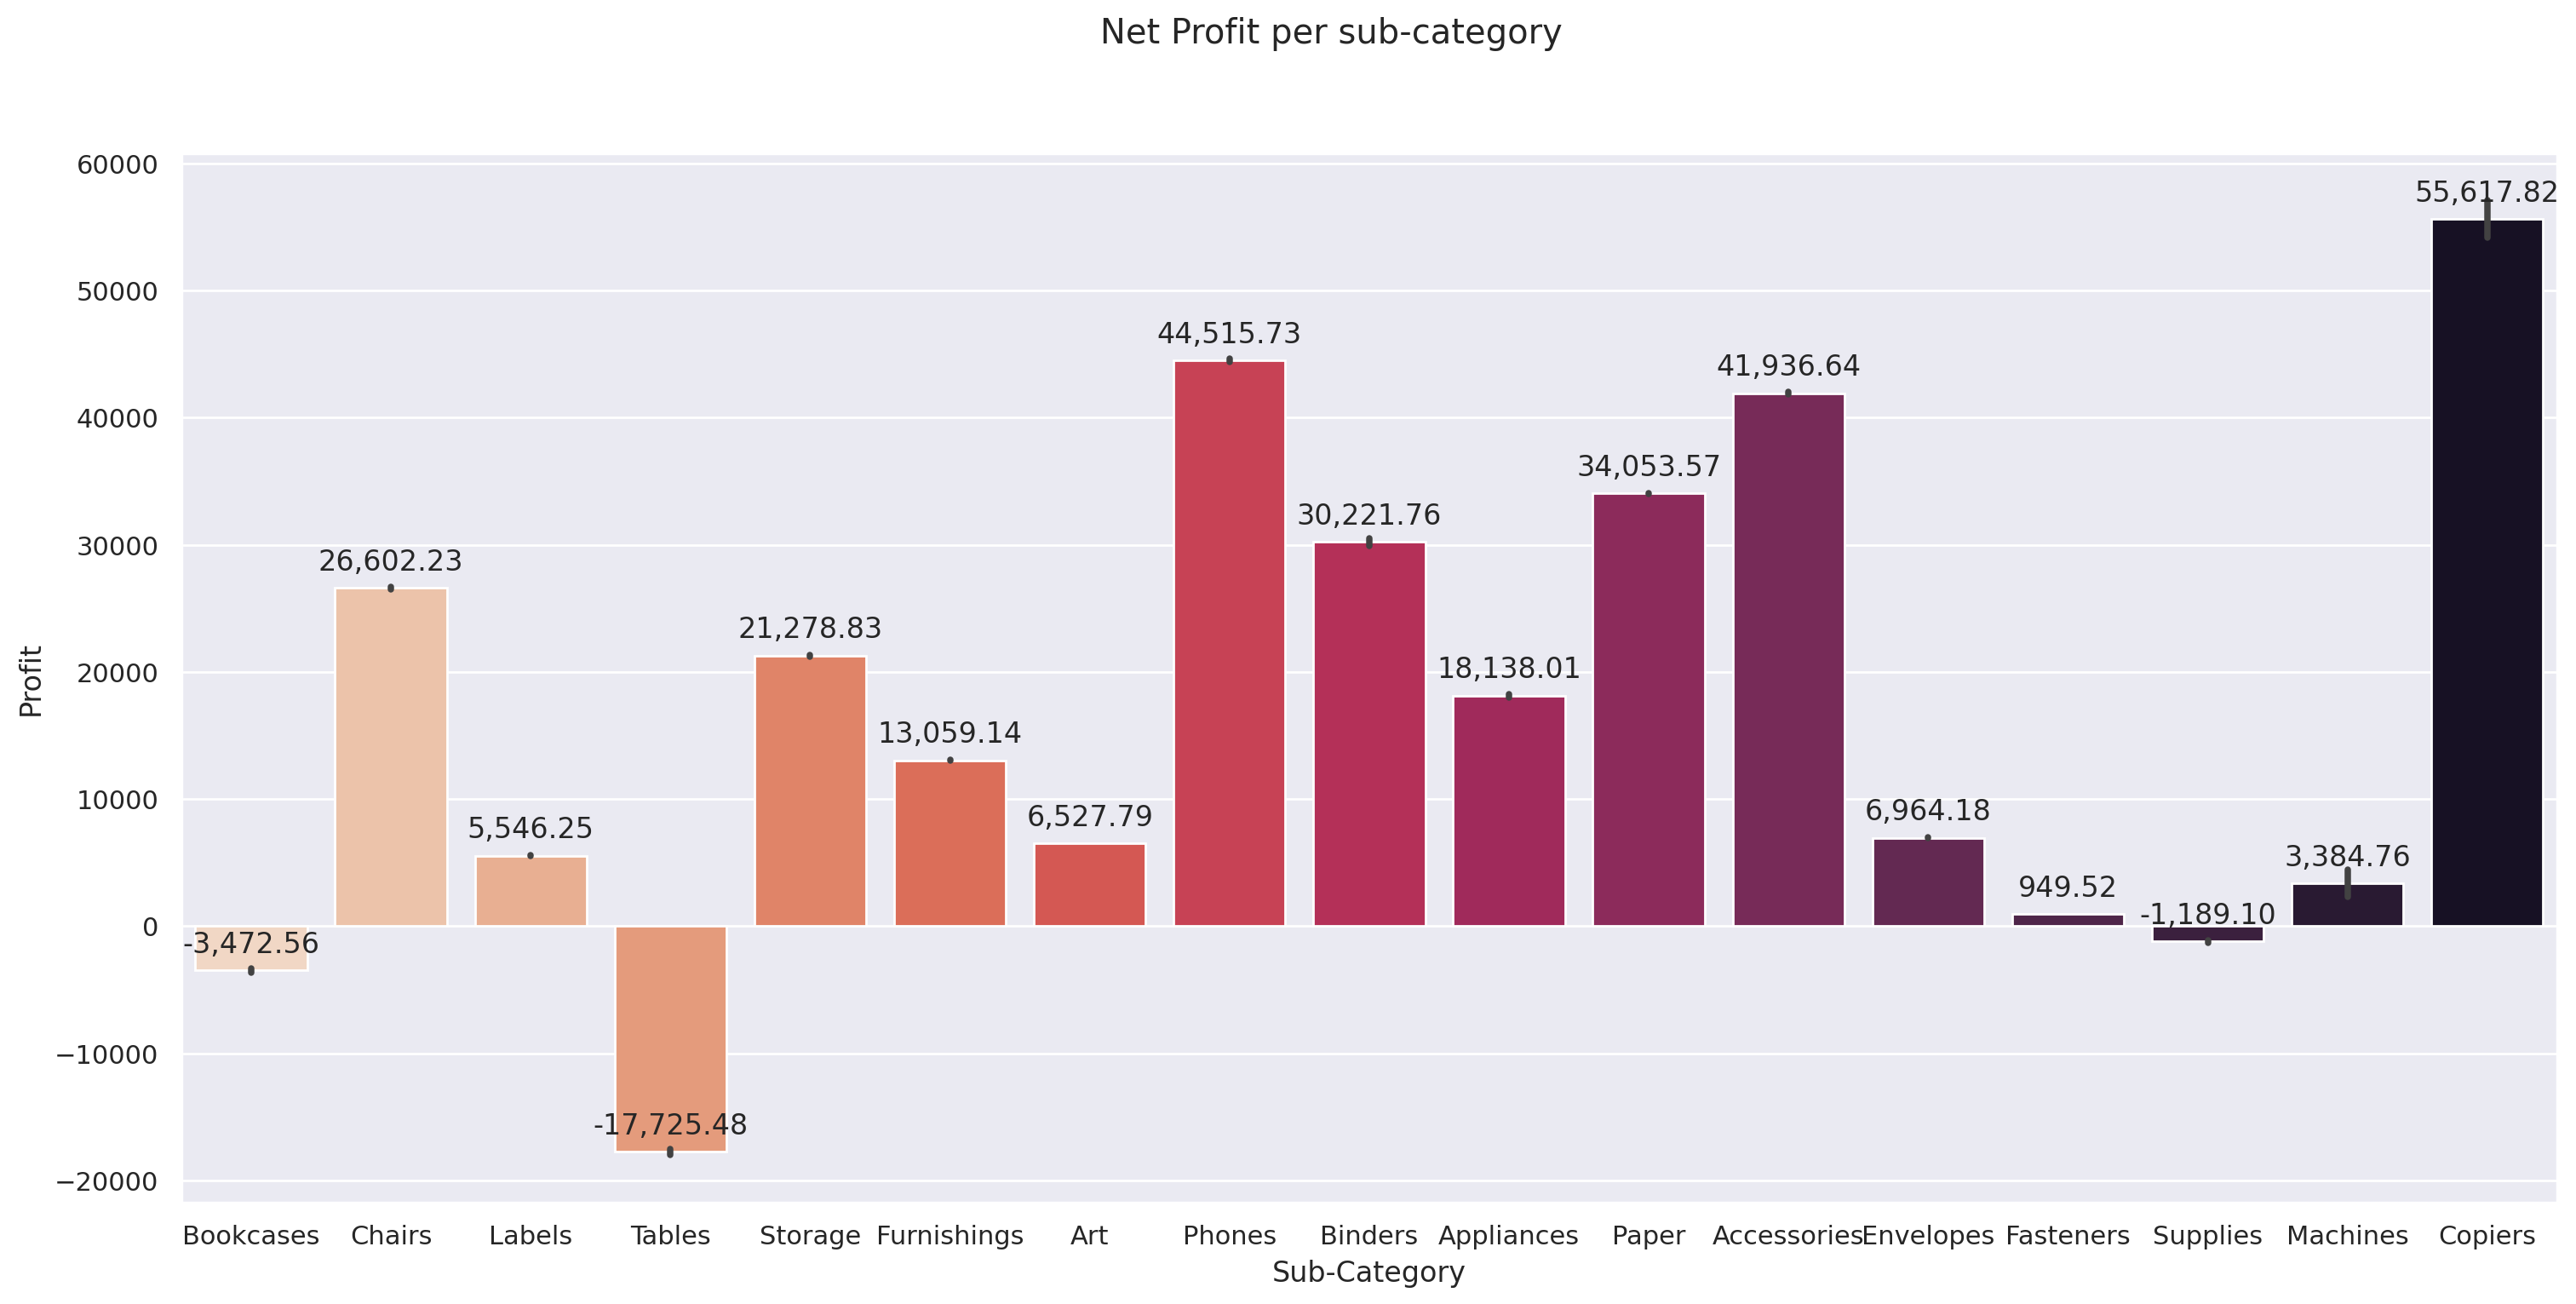

In [32]:
plt.figure(figsize=(18, 8), dpi=200)
sns.set(style='darkgrid')

ax = sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=np.sum, errorbar='sd', palette='rocket_r')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ',.2f'),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.suptitle('Net Profit per sub-category')
plt.show()


#### Findings:
#### Copiers sub-category of product have highest net profit.

### Which category of product have been ordered most in corporate segment?

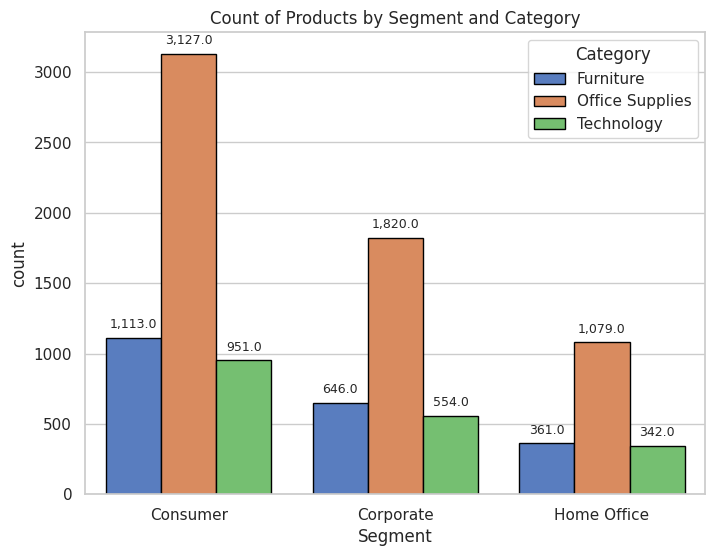

In [33]:
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')

ax = sns.countplot(data=df, x='Segment', hue='Category', palette='muted', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=9)

plt.title('Count of Products by Segment and Category')
plt.show()

#### Findings:
#### Office supplies category of product have been ordered most in corporate segment.

Text(0.5, 1.0, 'Sales VS Profit')

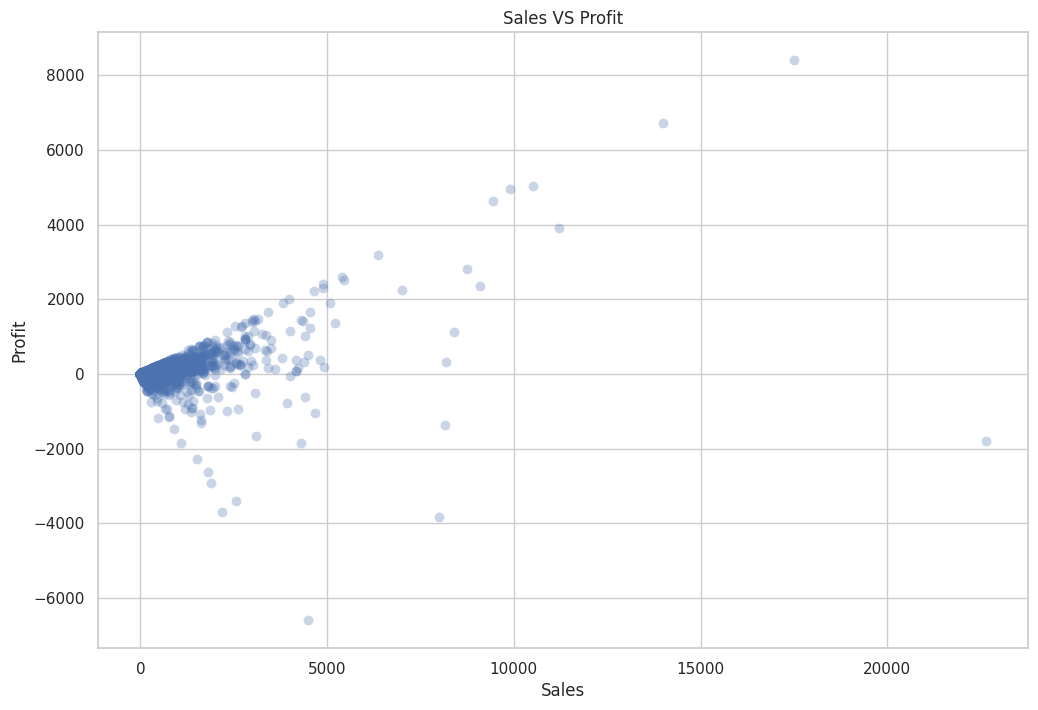

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Sales',y='Profit',data=df,s=50,linewidth=0,alpha=0.3)
plt.title("Sales VS Profit")

### In which category of product profit is more than 6000?

Text(0.5, 1.0, 'Overall Sales VS Profit Category wise')

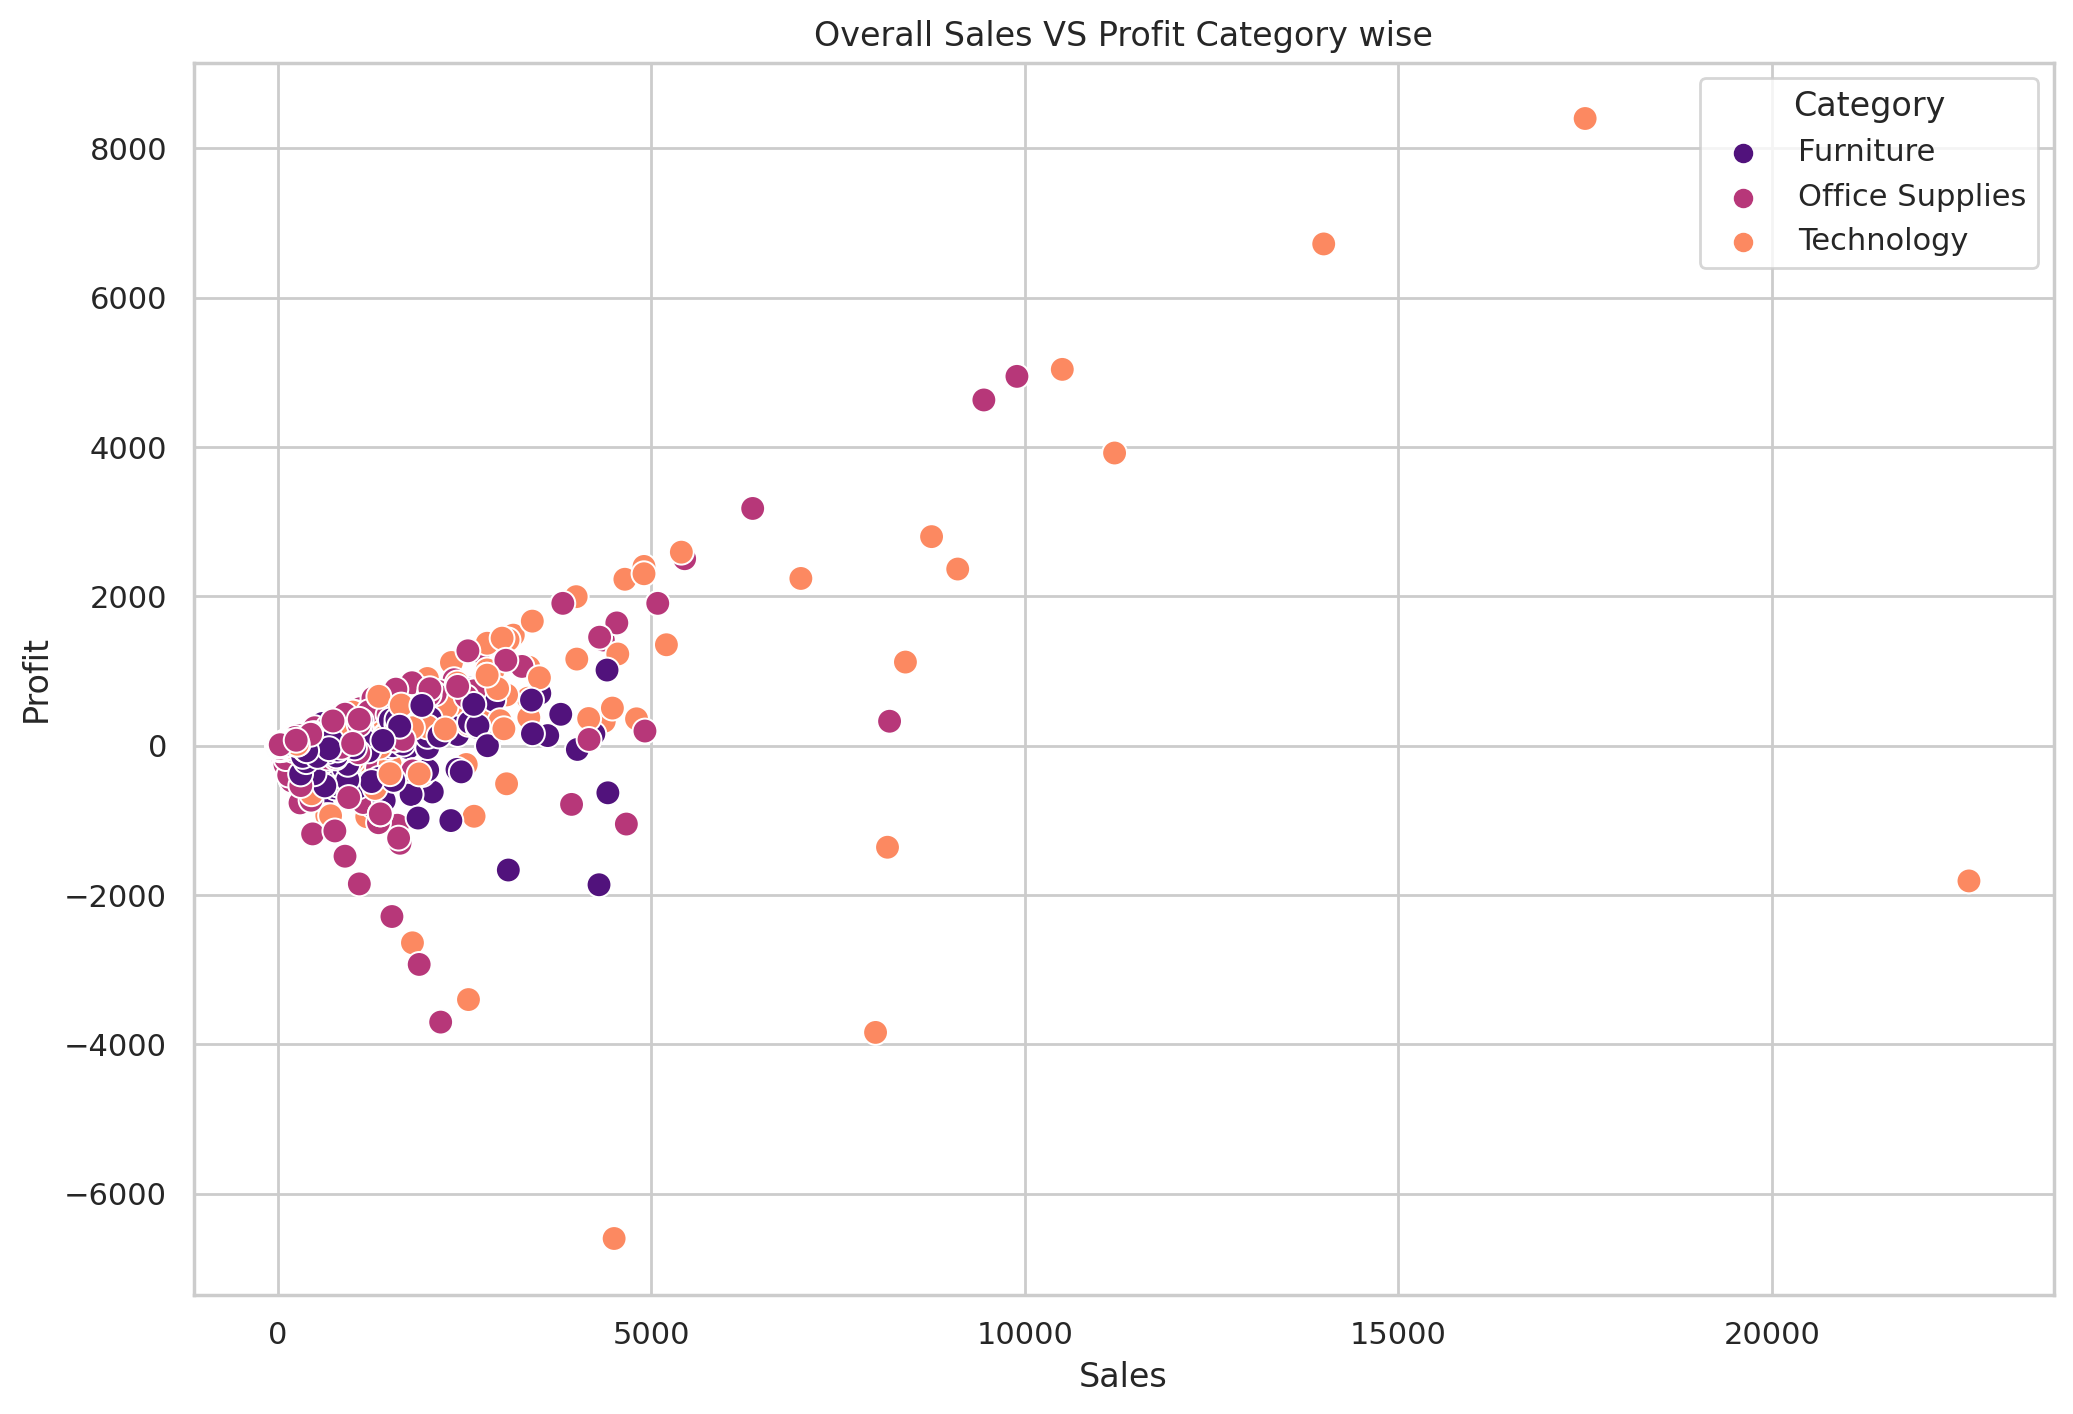

In [35]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Sales',y='Profit',data=df,hue='Category',s=80,palette='magma')
plt.title("Overall Sales VS Profit Category wise")

#### Findings:
#### In technology category profit is more than 6000.

### In which category of product discount offered is least and profit gained is highest?

Text(0.5, 1.0, 'Overall Sales VS Profit Discount wise')

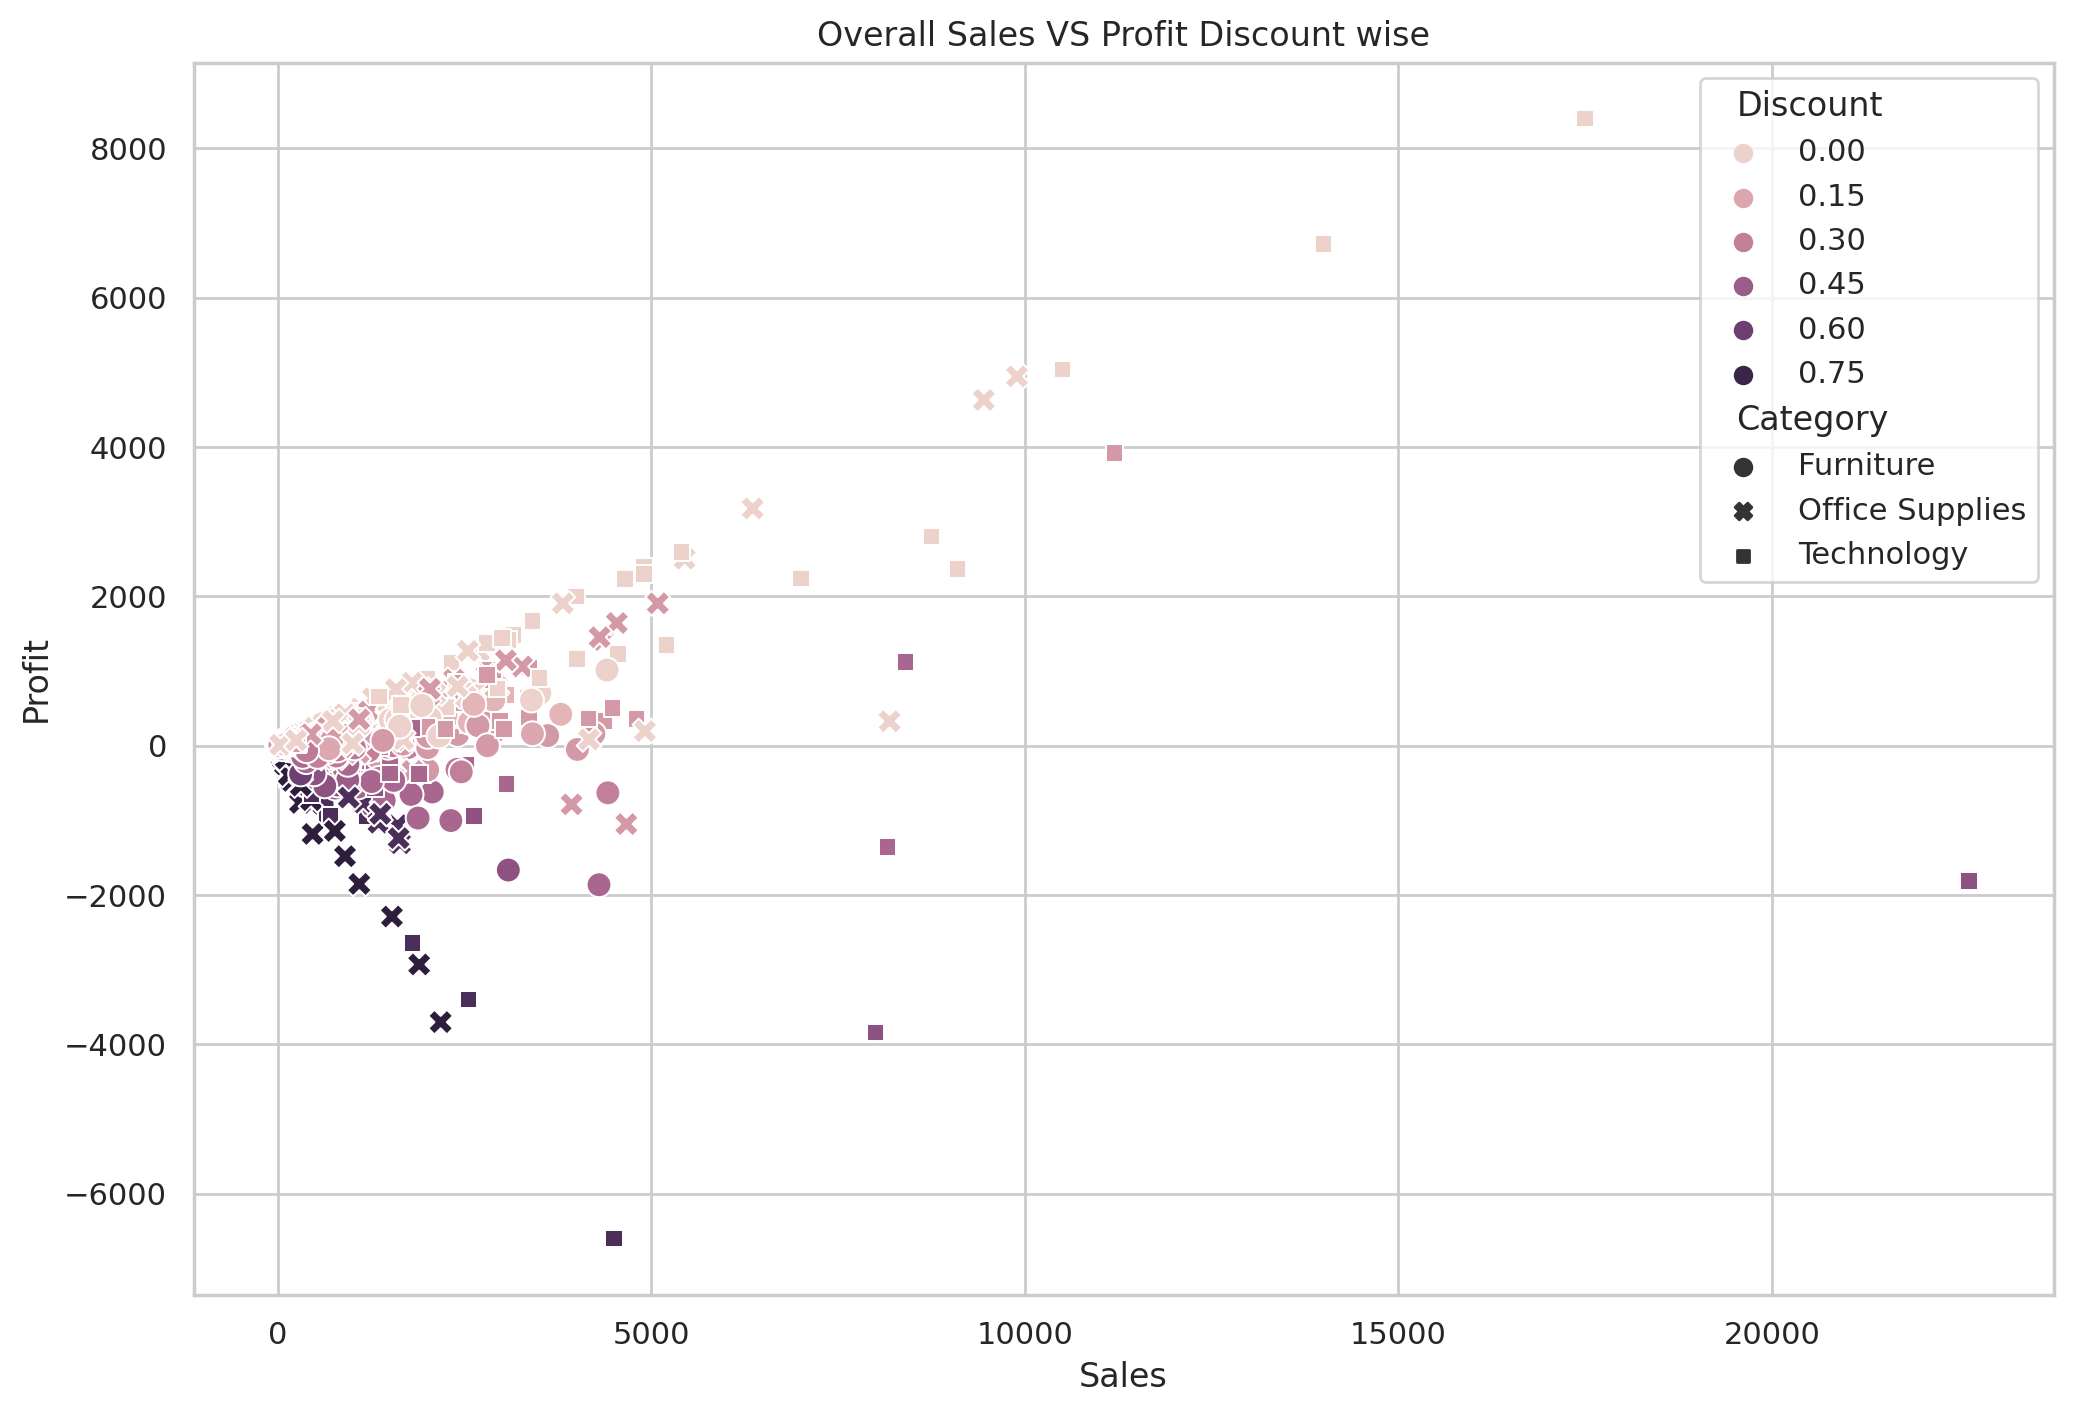

In [36]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Sales',y='Profit',data=df,style='Category',hue='Discount',s=80)
plt.title("Overall Sales VS Profit Discount wise")

#### Findings
#### In technology category, discount offered is least and profit gained is highest.

###  In which month technology category of product have been ordered most?

In [37]:
new_quant=df.groupby(['Order Month','Category'])['Quantity'].sum().reset_index()
fig = px.line(df, x=new_quant['Order Month'], y=new_quant['Quantity'], symbol=new_quant['Category'],color=new_quant['Category'], markers=True,title='Quantity of product sold VS Order Month')
fig.update_traces(textposition="bottom right")
fig.show()

#### Findings:
#### In November, technology category of product have been ordered most

### In which year the amount of office supplies category of product sold is same as the technology category of product sold?

In [38]:
new_quant=df.groupby(['Order Year','Category'])['Quantity'].sum().reset_index()
fig = px.line(df, x=new_quant['Order Year'], y=new_quant['Quantity'],symbol=new_quant['Category'], color=new_quant['Category'], markers=True,title='Quantity of product sold VS Order Year')
fig.update_traces(textposition="bottom right")
fig.show()


#### Findings:
#### In 2017 the amount of office supplies category of product sold is approximately same as the technology category of product sold.

### Which month had the highest sales?

In [39]:
sales_by_month = df.groupby(['Order Month'])['Sales'].sum().reset_index()
fig = px.line(sales_by_month, x='Order Month', y='Sales', title='Monthly Sales Analysis')
fig.show()

#### Findings:
#### In November month, sales was highest.

### Which month had the highest profit?

In [40]:
profit_by_month = df.groupby(['Order Month'])['Profit'].sum().reset_index()
fig = px.line(profit_by_month, x='Order Month', y='Profit', title='Monthly Profit Analysis')
fig.show()

#### Findings:
#### In December month, profit was highest.

### Which customer contributed most towards sales?

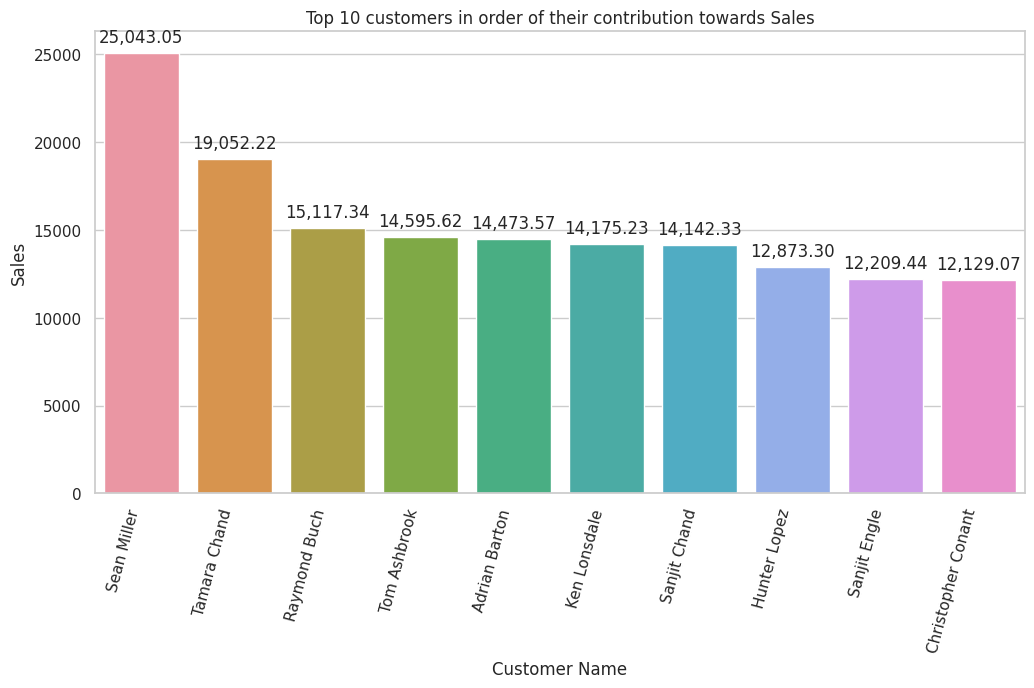

In [41]:
order_by_customer = df.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
order_by_customer = order_by_customer.head(10)

plt.figure(figsize=(12, 6))
sns.set_palette('rocket')

chart = sns.barplot(data=order_by_customer, x='Customer Name', y='Sales')

for p in chart.patches:
    height = p.get_height()
    chart.annotate(format(height, ',.2f'),
                   (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', xytext=(0, 5),
                   textcoords='offset points', fontsize=12)

chart.set_xticklabels(chart.get_xticklabels(), rotation=75, horizontalalignment='right')
chart.set(title='Top 10 customers in order of their contribution towards Sales')
plt.show()

#### Findings:
#### Sean Miller contributed most towards sales.

### Which state contributed most towards sales?

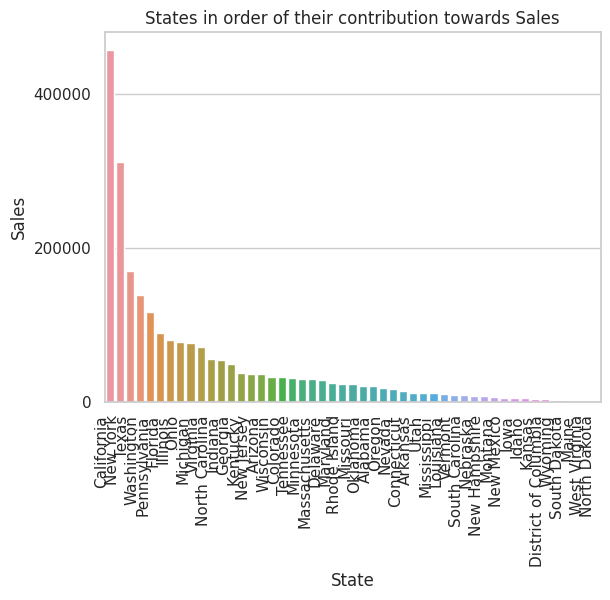

In [42]:
order_by_state = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
chart = sns.barplot(data=order_by_state,x='State',y='Sales')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')
chart.set(title='States in order of their contribution towards Sales')
width = 50
height = 30
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=4)
plt.show()

#### Findings:
#### California contributed most towards sales.

### Which city contributed most towards sales?

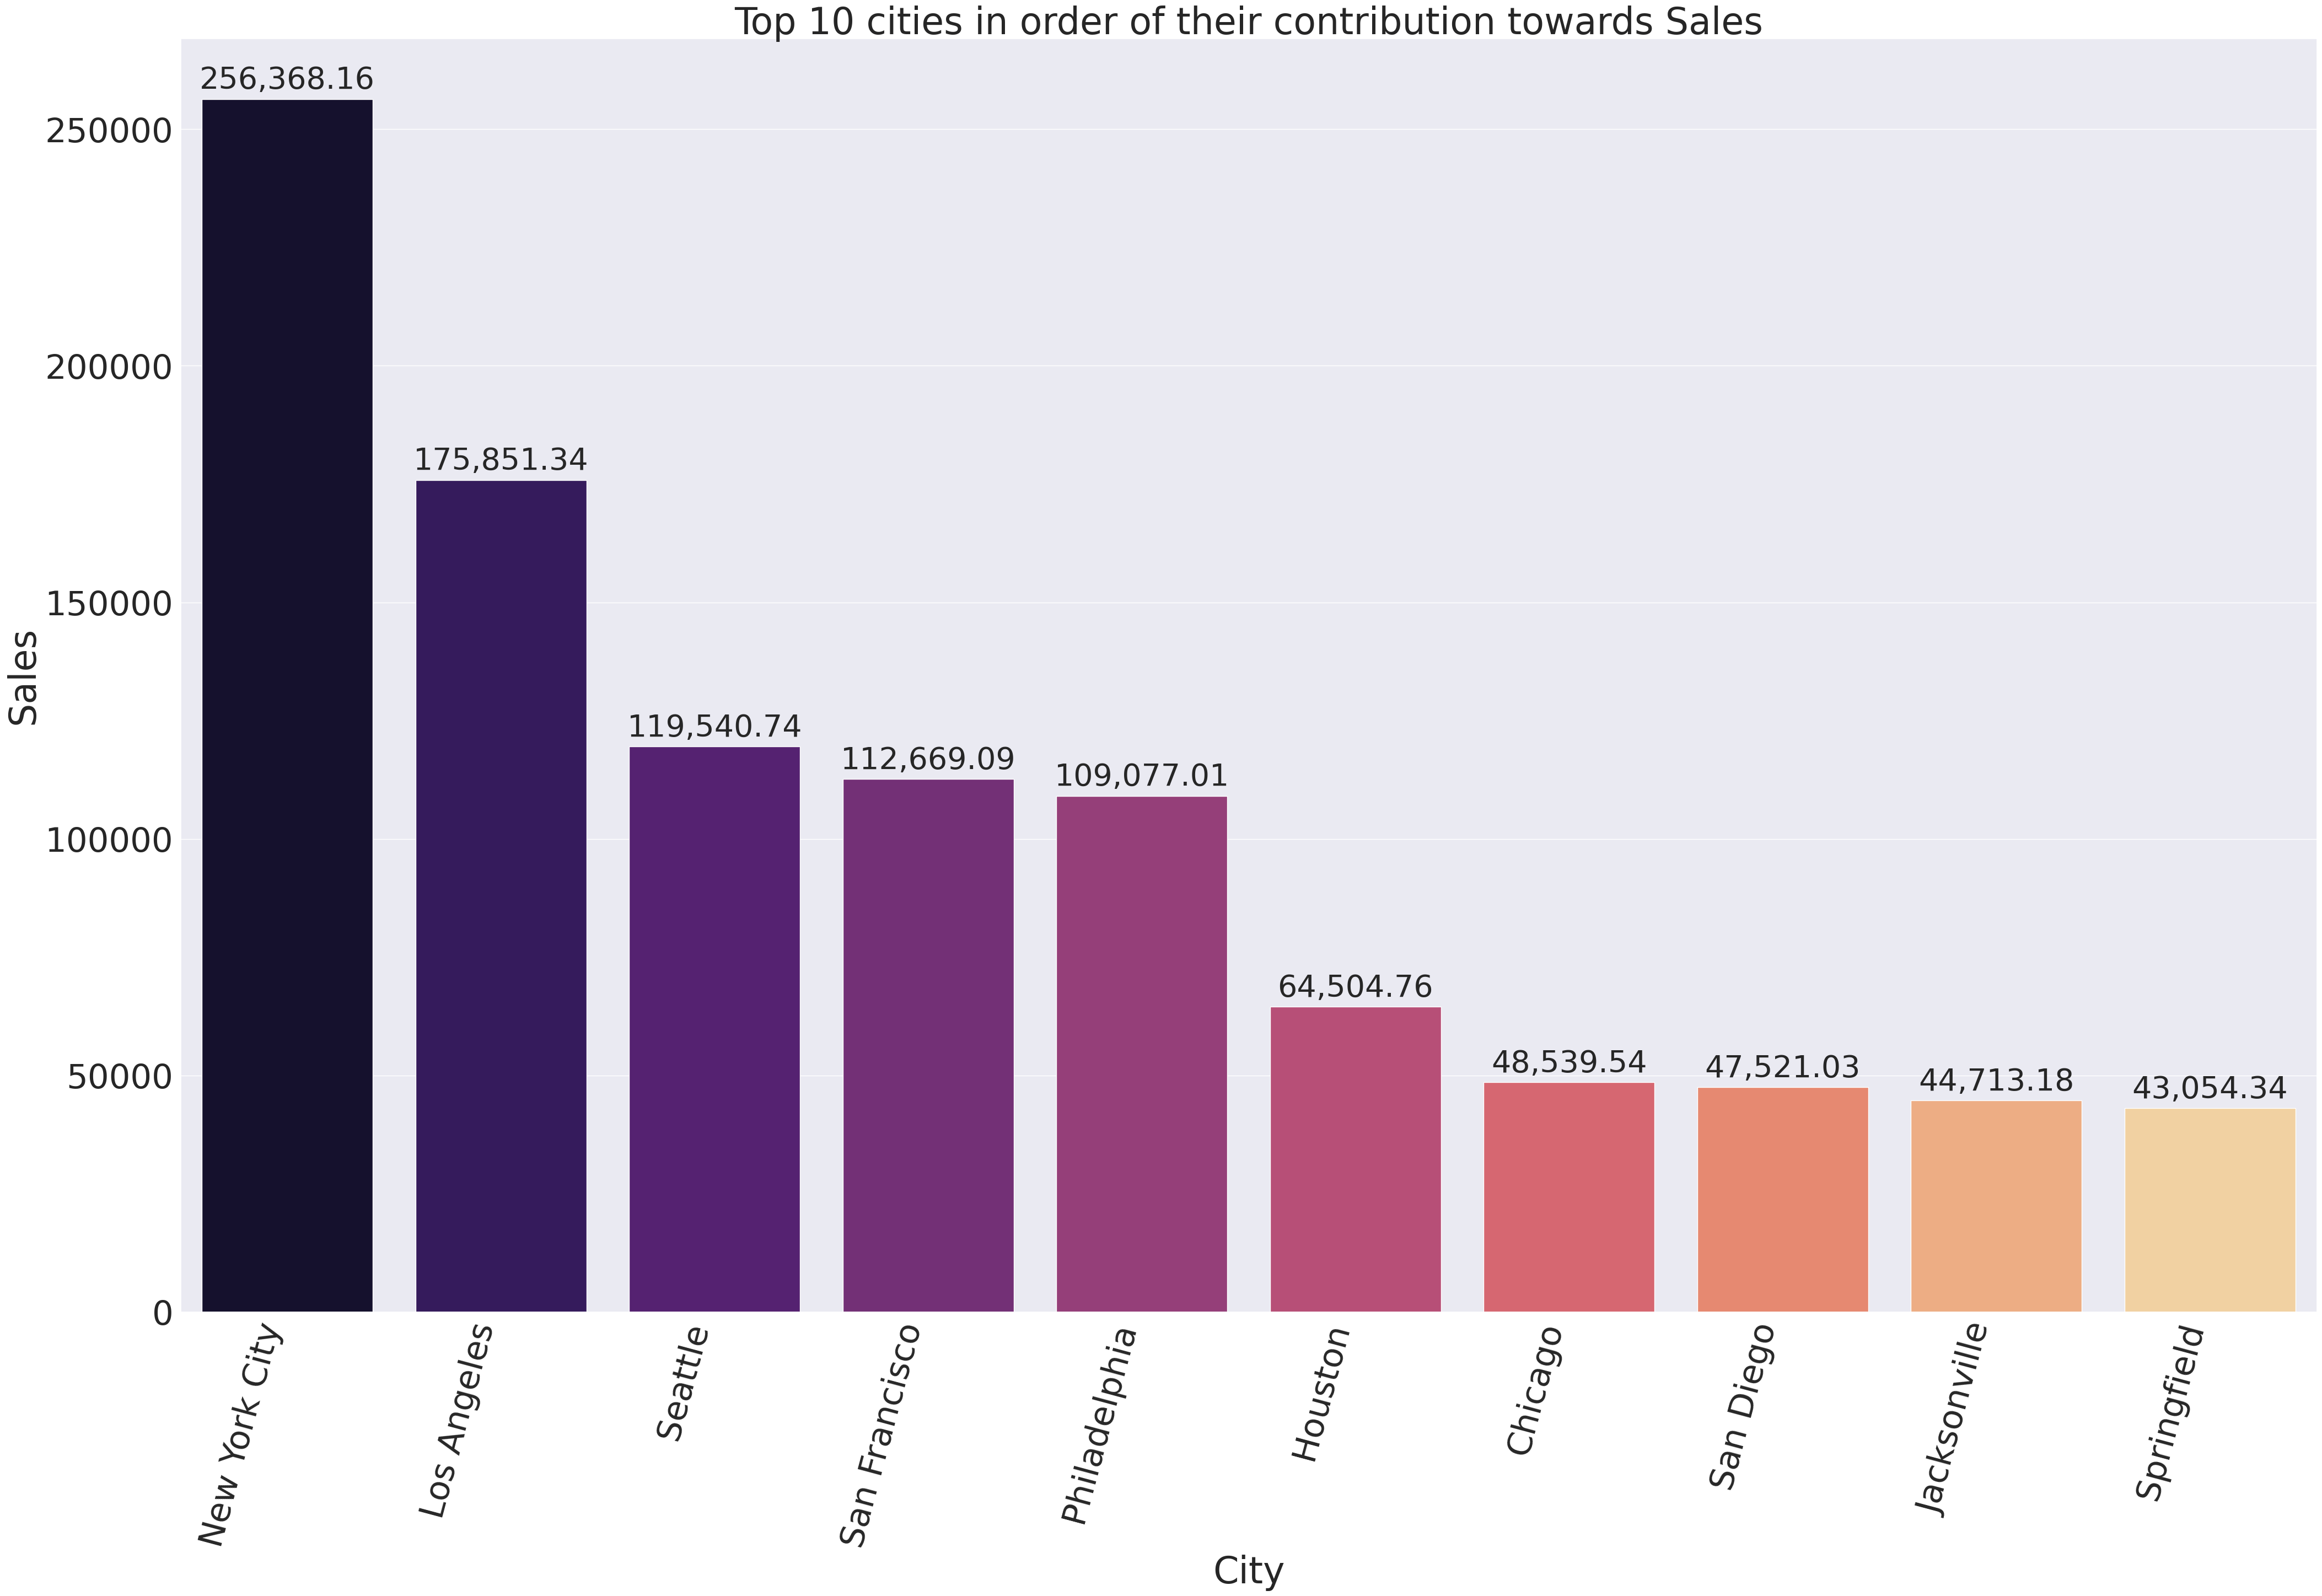

In [43]:
order_by_cities = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
order_by_cities= order_by_cities.head(10)
chart = sns.barplot(data=order_by_cities,x='City',y='Sales',palette='magma')

for p in chart.patches:
    height = p.get_height()
    chart.annotate(format(height, ',.2f'),
                   (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', xytext=(0, 5),
                   textcoords='offset points', fontsize=40)

chart.set_xticklabels(chart.get_xticklabels(), rotation=75,horizontalalignment='right')
chart.set(title='Top 10 cities in order of their contribution towards Sales')
None

#### Findings:
#### New York City contributed most towards sales.

### Which region contributed most towards sales?

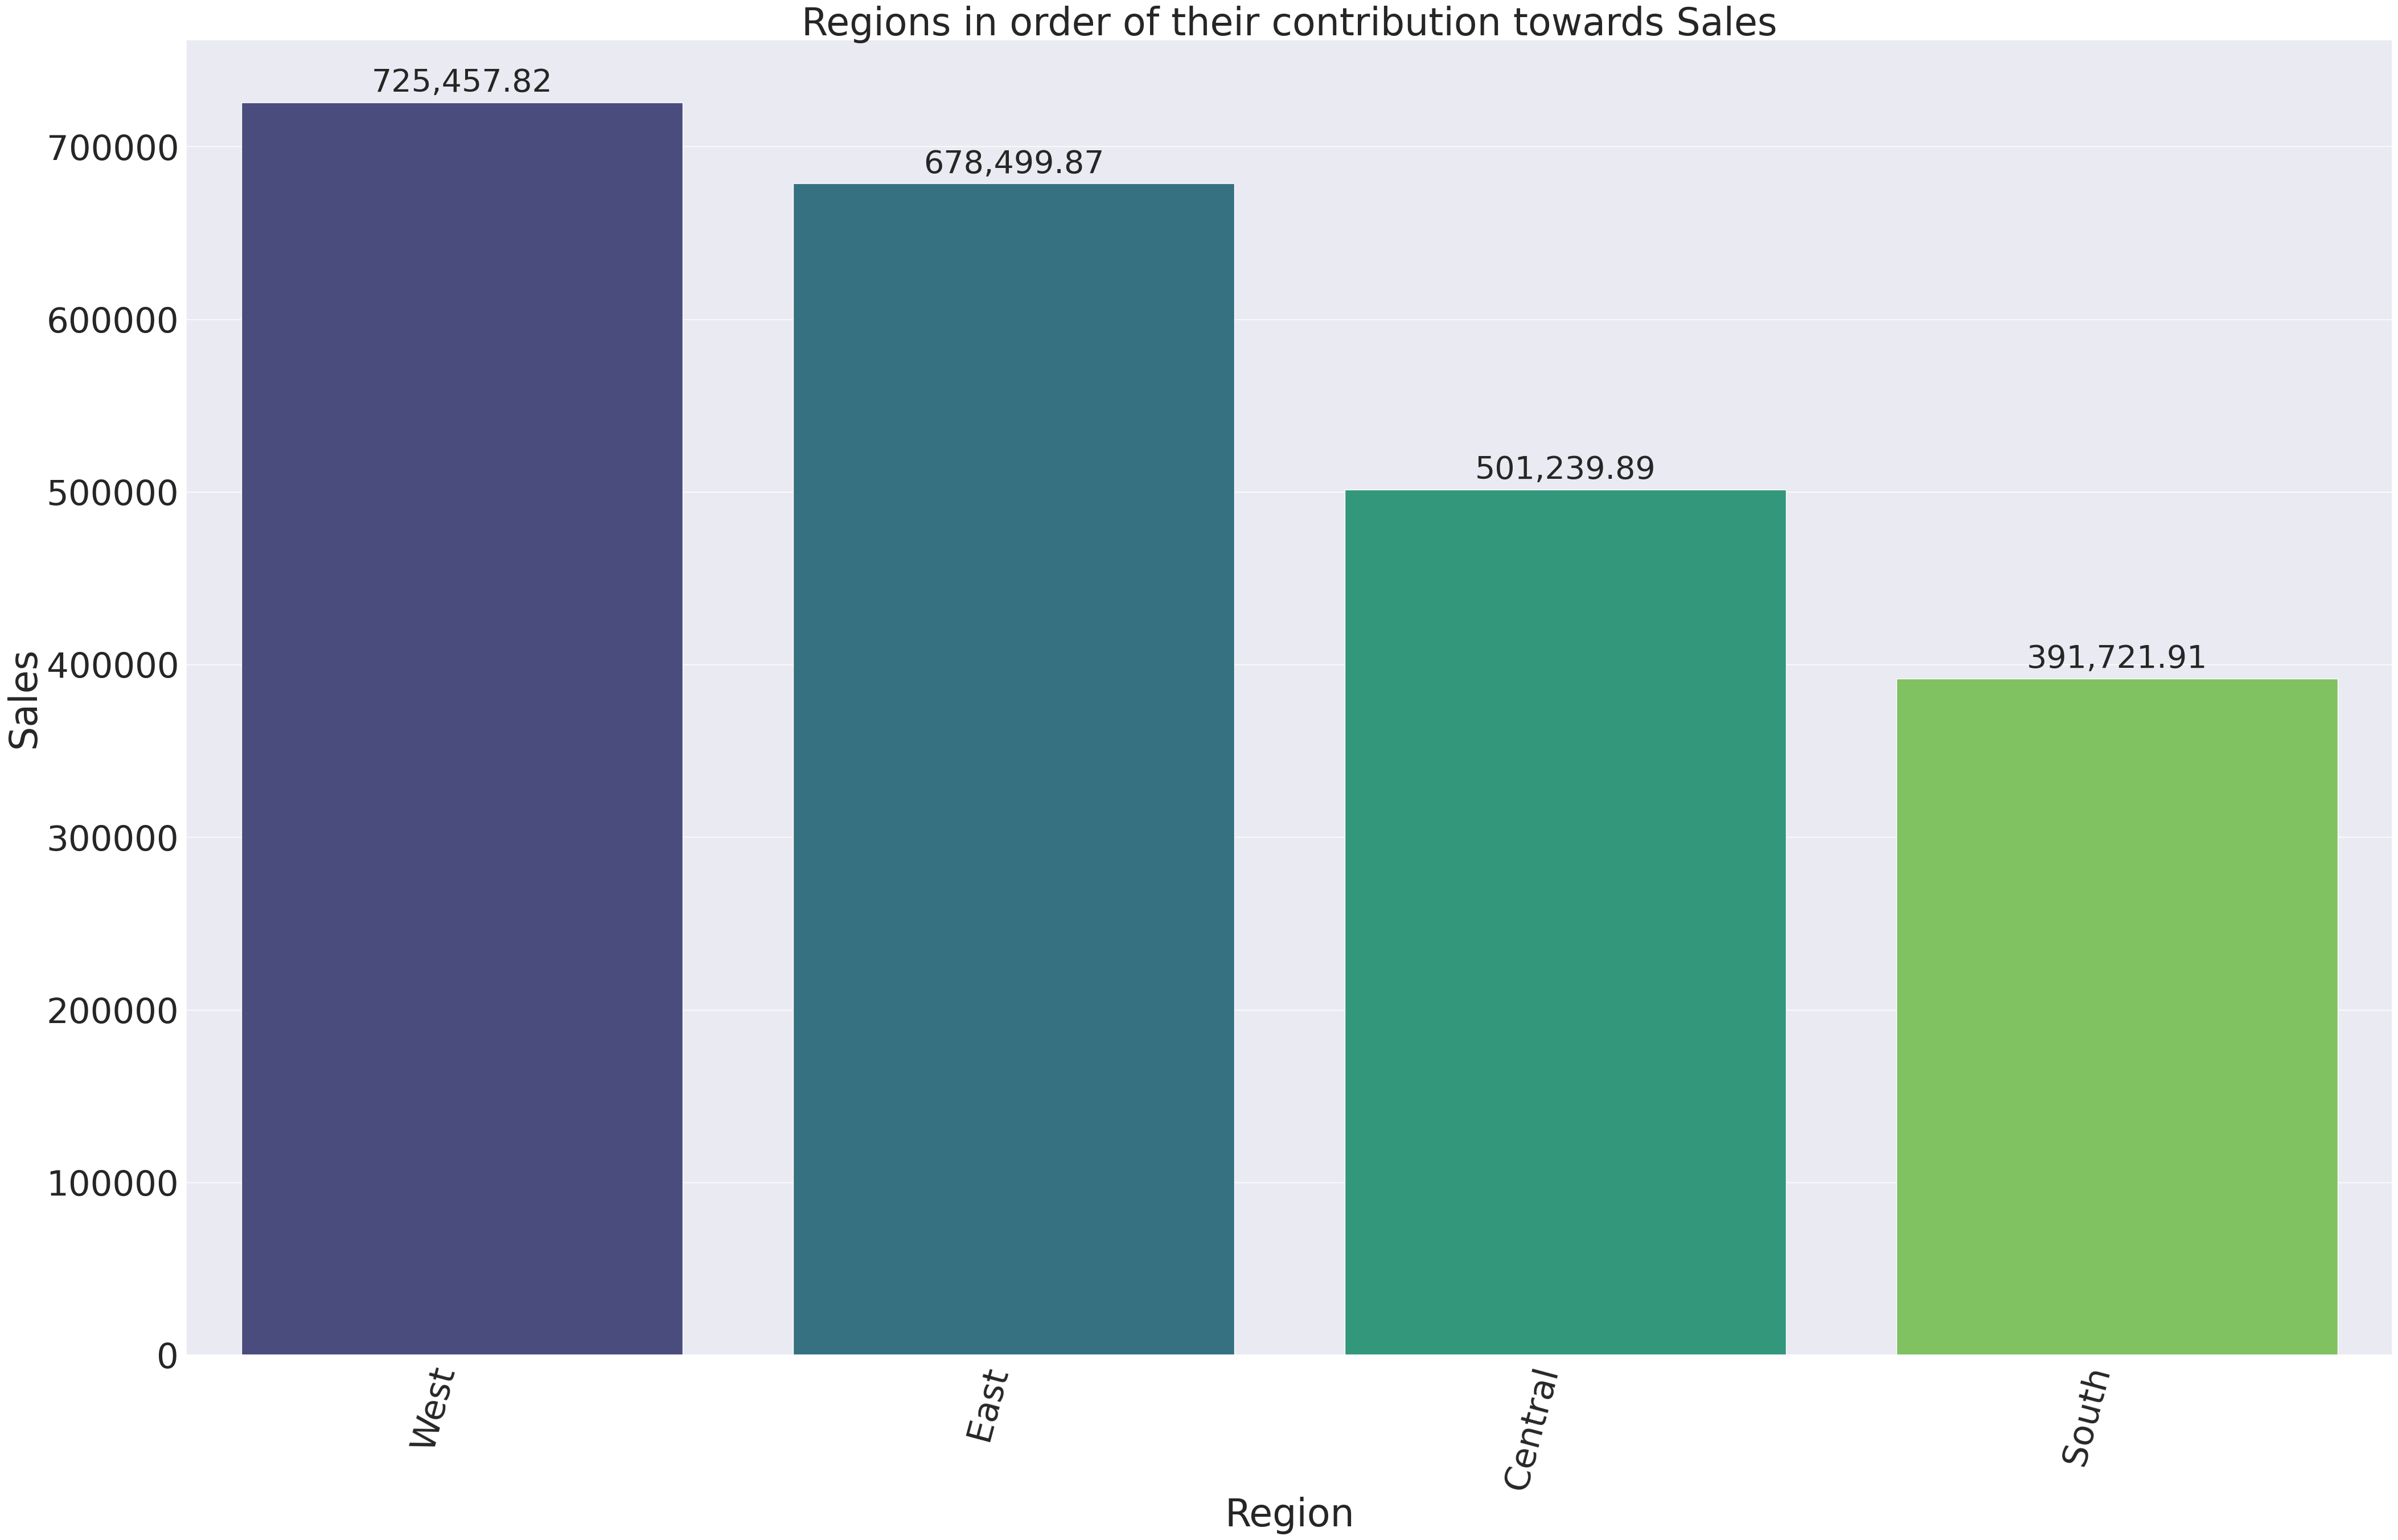

In [44]:
order_by_region = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
chart = sns.barplot(data=order_by_region,x='Region',y='Sales',palette='viridis')

for p in chart.patches:
    height = p.get_height()
    chart.annotate(format(height, ',.2f'),
                   (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', xytext=(0, 5),
                   textcoords='offset points', fontsize=40)

chart.set_xticklabels(chart.get_xticklabels(), rotation=75,horizontalalignment='right')
chart.set(title='Regions in order of their contribution towards Sales')
None

#### Findings:
#### West region contributed most towards sales.

In [45]:
df

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Ship Month,Ship Year,Ship Day of Week
0,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,...,261.9600,2,0.00,41.9136,11,2016,1,11,2016,4
1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,...,731.9400,3,0.00,219.5820,11,2016,1,11,2016,4
2,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,...,14.6200,2,0.00,6.8714,6,2016,6,6,2016,3
3,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,957.5775,5,0.45,-383.0310,10,2015,6,10,2015,6
4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,22.3680,2,0.20,2.5164,10,2015,6,10,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,...,25.2480,3,0.20,4.1028,1,2014,1,1,2014,3
9990,CA-2017-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,...,91.9600,2,0.00,15.6332,2,2017,6,3,2017,4
9991,CA-2017-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,...,258.5760,2,0.20,19.3932,2,2017,6,3,2017,4
9992,CA-2017-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,...,29.6000,4,0.00,13.3200,2,2017,6,3,2017,4


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           9993 non-null   object 
 1   Ship Mode          9993 non-null   object 
 2   Customer ID        9993 non-null   object 
 3   Customer Name      9993 non-null   object 
 4   Segment            9993 non-null   object 
 5   Country            9993 non-null   object 
 6   City               9993 non-null   object 
 7   State              9993 non-null   object 
 8   Postal Code        9993 non-null   int64  
 9   Region             9993 non-null   object 
 10  Product ID         9993 non-null   object 
 11  Category           9993 non-null   object 
 12  Sub-Category       9993 non-null   object 
 13  Product Name       9993 non-null   object 
 14  Sales              9993 non-null   float64
 15  Quantity           9993 non-null   int64  
 16  Discount           9993 

##Outlier Removal

In [47]:
new_df = df.copy(deep=True)

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           9993 non-null   object 
 1   Ship Mode          9993 non-null   object 
 2   Customer ID        9993 non-null   object 
 3   Customer Name      9993 non-null   object 
 4   Segment            9993 non-null   object 
 5   Country            9993 non-null   object 
 6   City               9993 non-null   object 
 7   State              9993 non-null   object 
 8   Postal Code        9993 non-null   int64  
 9   Region             9993 non-null   object 
 10  Product ID         9993 non-null   object 
 11  Category           9993 non-null   object 
 12  Sub-Category       9993 non-null   object 
 13  Product Name       9993 non-null   object 
 14  Sales              9993 non-null   float64
 15  Quantity           9993 non-null   int64  
 16  Discount           9993 

In [49]:
new_df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Product Name', 'Order Month', 'Order Year', 'Order Day of Week', 'Ship Month', 'Ship Year', 'Ship Day of Week'], axis=1,inplace=True)
#deleting the columns which are not required for prediction

In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Sub-Category  9993 non-null   object 
 3   Sales         9993 non-null   float64
 4   Quantity      9993 non-null   int64  
 5   Discount      9993 non-null   float64
 6   Profit        9993 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 624.6+ KB


<Axes: >

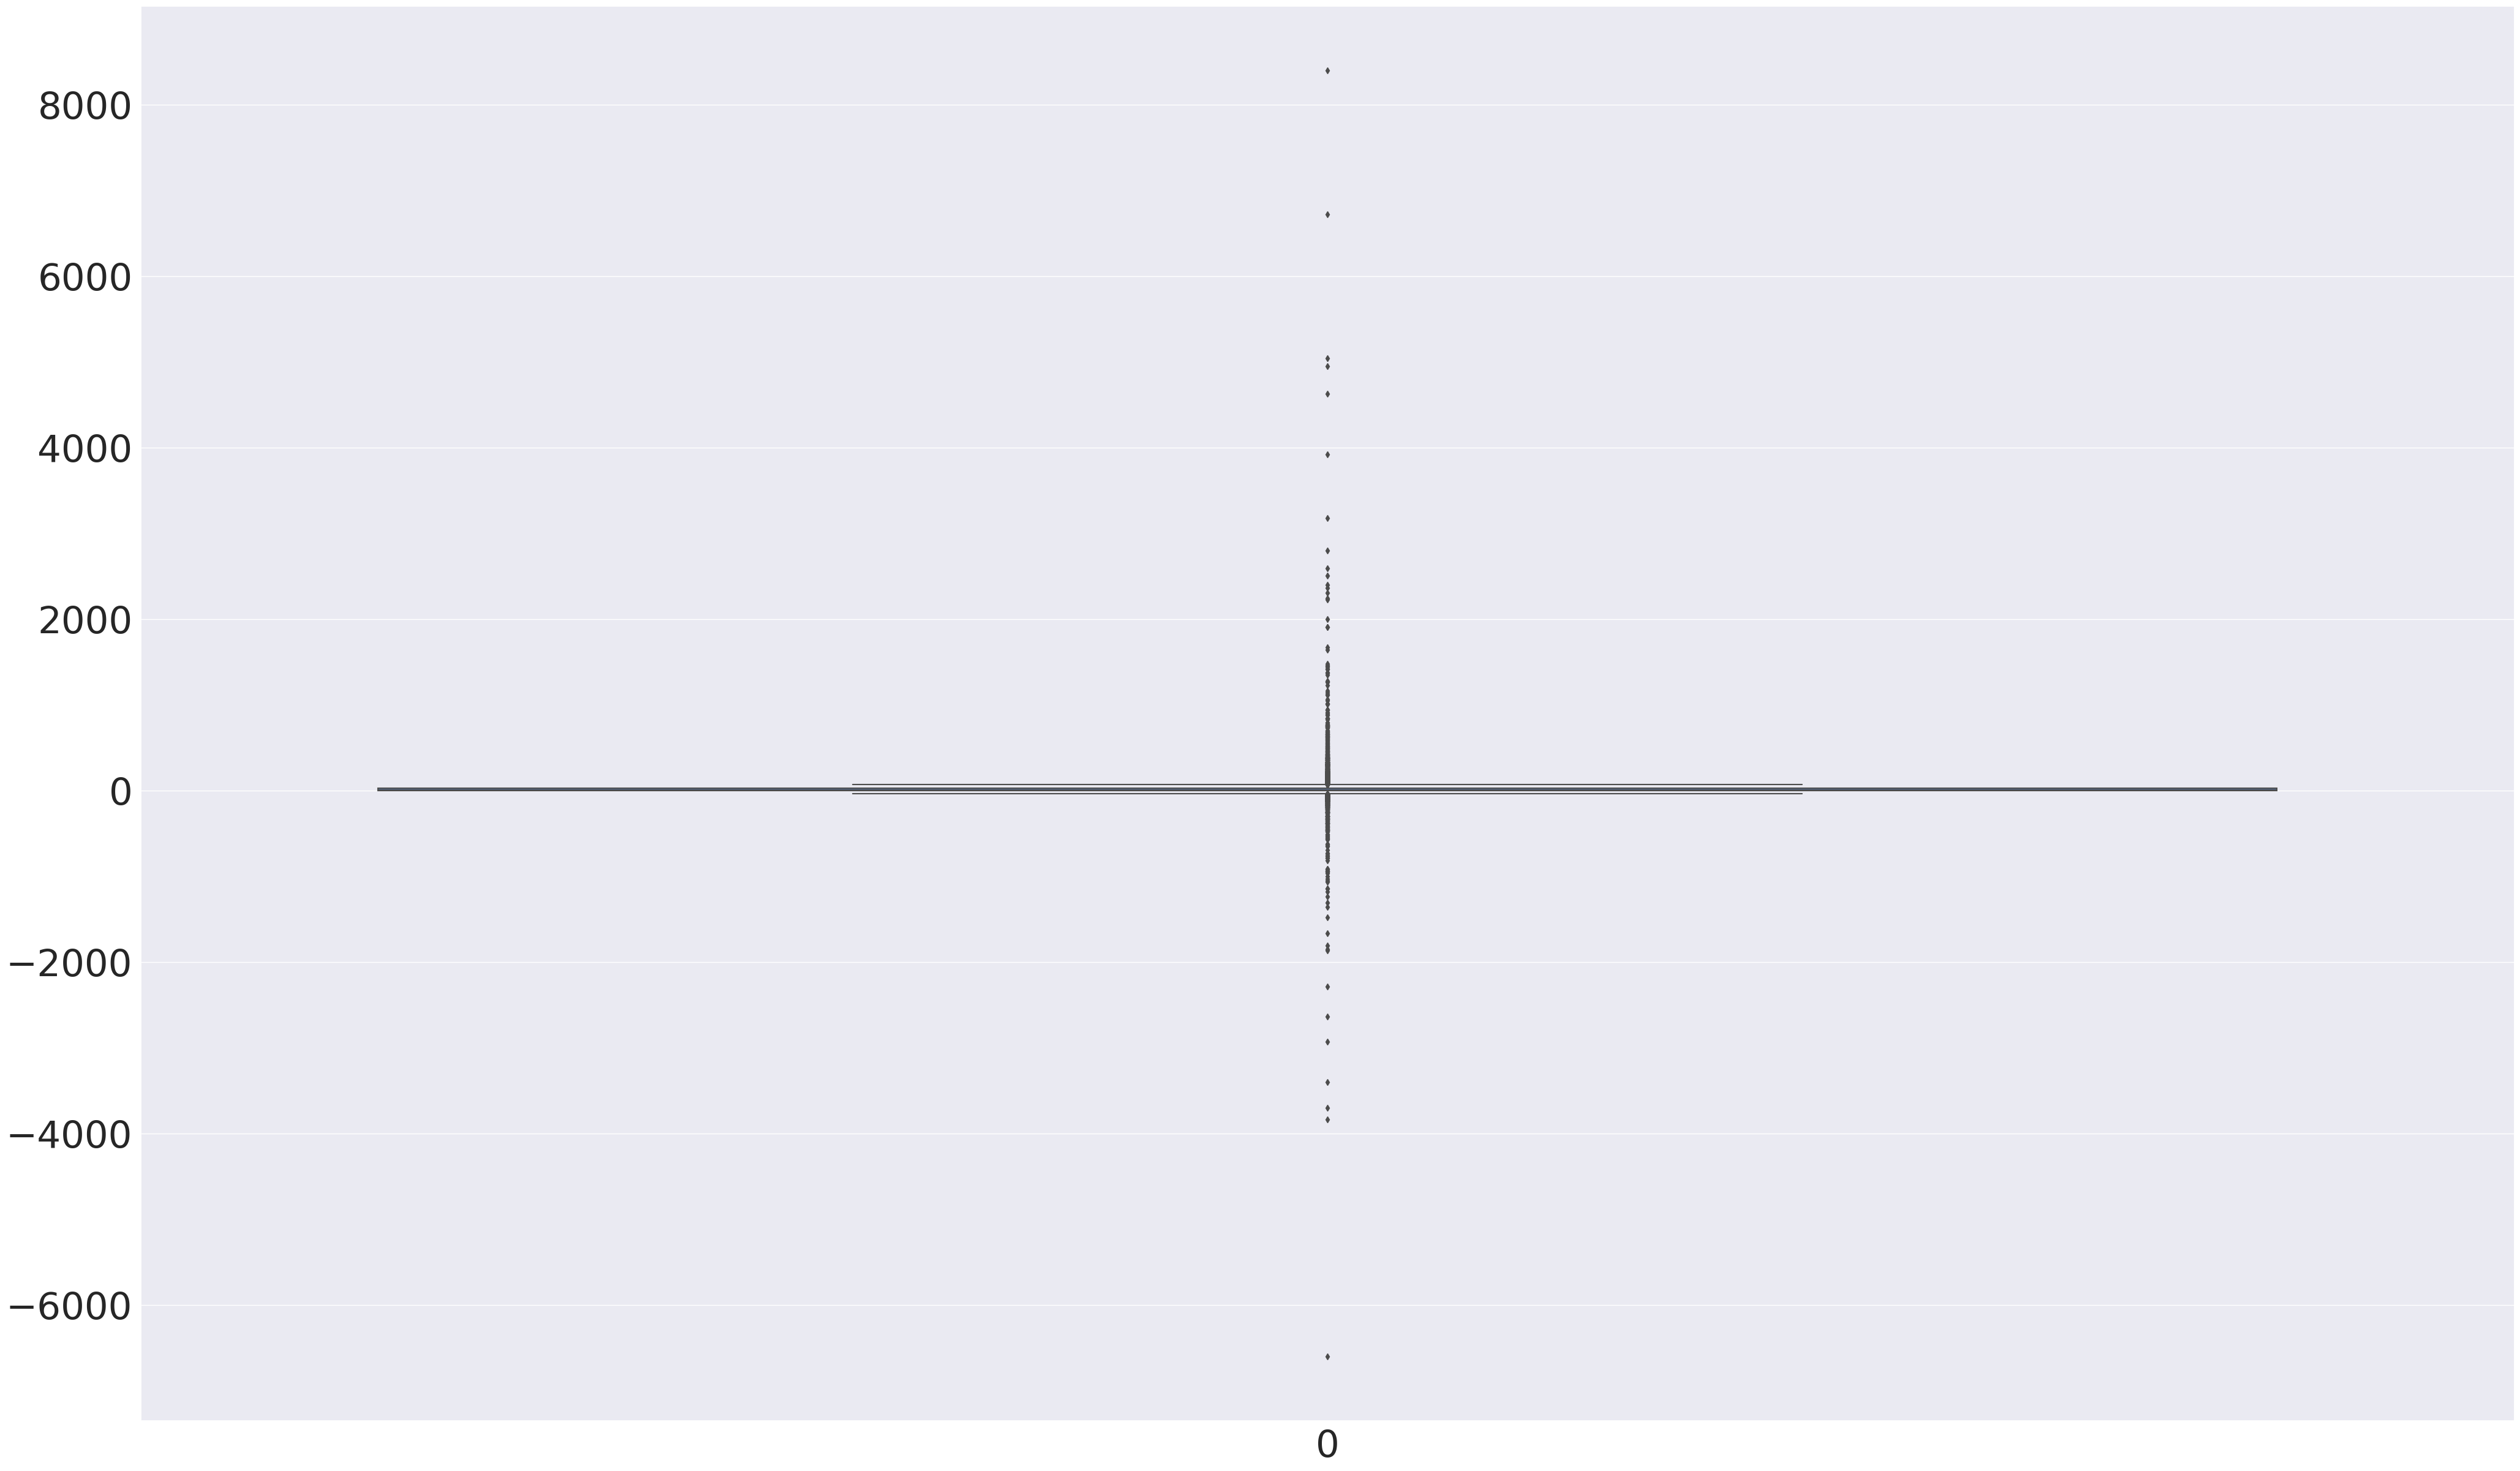

In [51]:
sns.boxplot(new_df['Profit'])       #Checking for outliers using boxplot

In [52]:
new_df.describe()  #Getting statistical info about the data

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [53]:
max_threshold = new_df['Profit'].quantile(0.95)         #Calculating the minimum and maximum threshold for profit column
min_threshold = new_df['Profit'].quantile(0.05)         #5%ile and 95%ile

In [54]:
new_df = new_df[(new_df['Profit'] > min_threshold) & (new_df['Profit'] < max_threshold)]        #Removing the rows in which the profit is out of range

In [55]:
new_df.describe()

,Sales,Quantity,Discount,Profit
count,8992.000000,8992.000000,8992.000000,8992.000000
mean,128.446728,3.657585,0.144901,19.147666
std,231.864405,2.156349,0.196165,33.804200
min,0.444000,1.000000,0.000000,-53.008800
25%,15.423000,2.000000,0.000000,2.340750
50%,43.010000,3.000000,0.100000,8.666500
75%,143.977500,5.000000,0.200000,25.191600
max,4228.704000,14.000000,0.800000,168.438400


<Axes: >

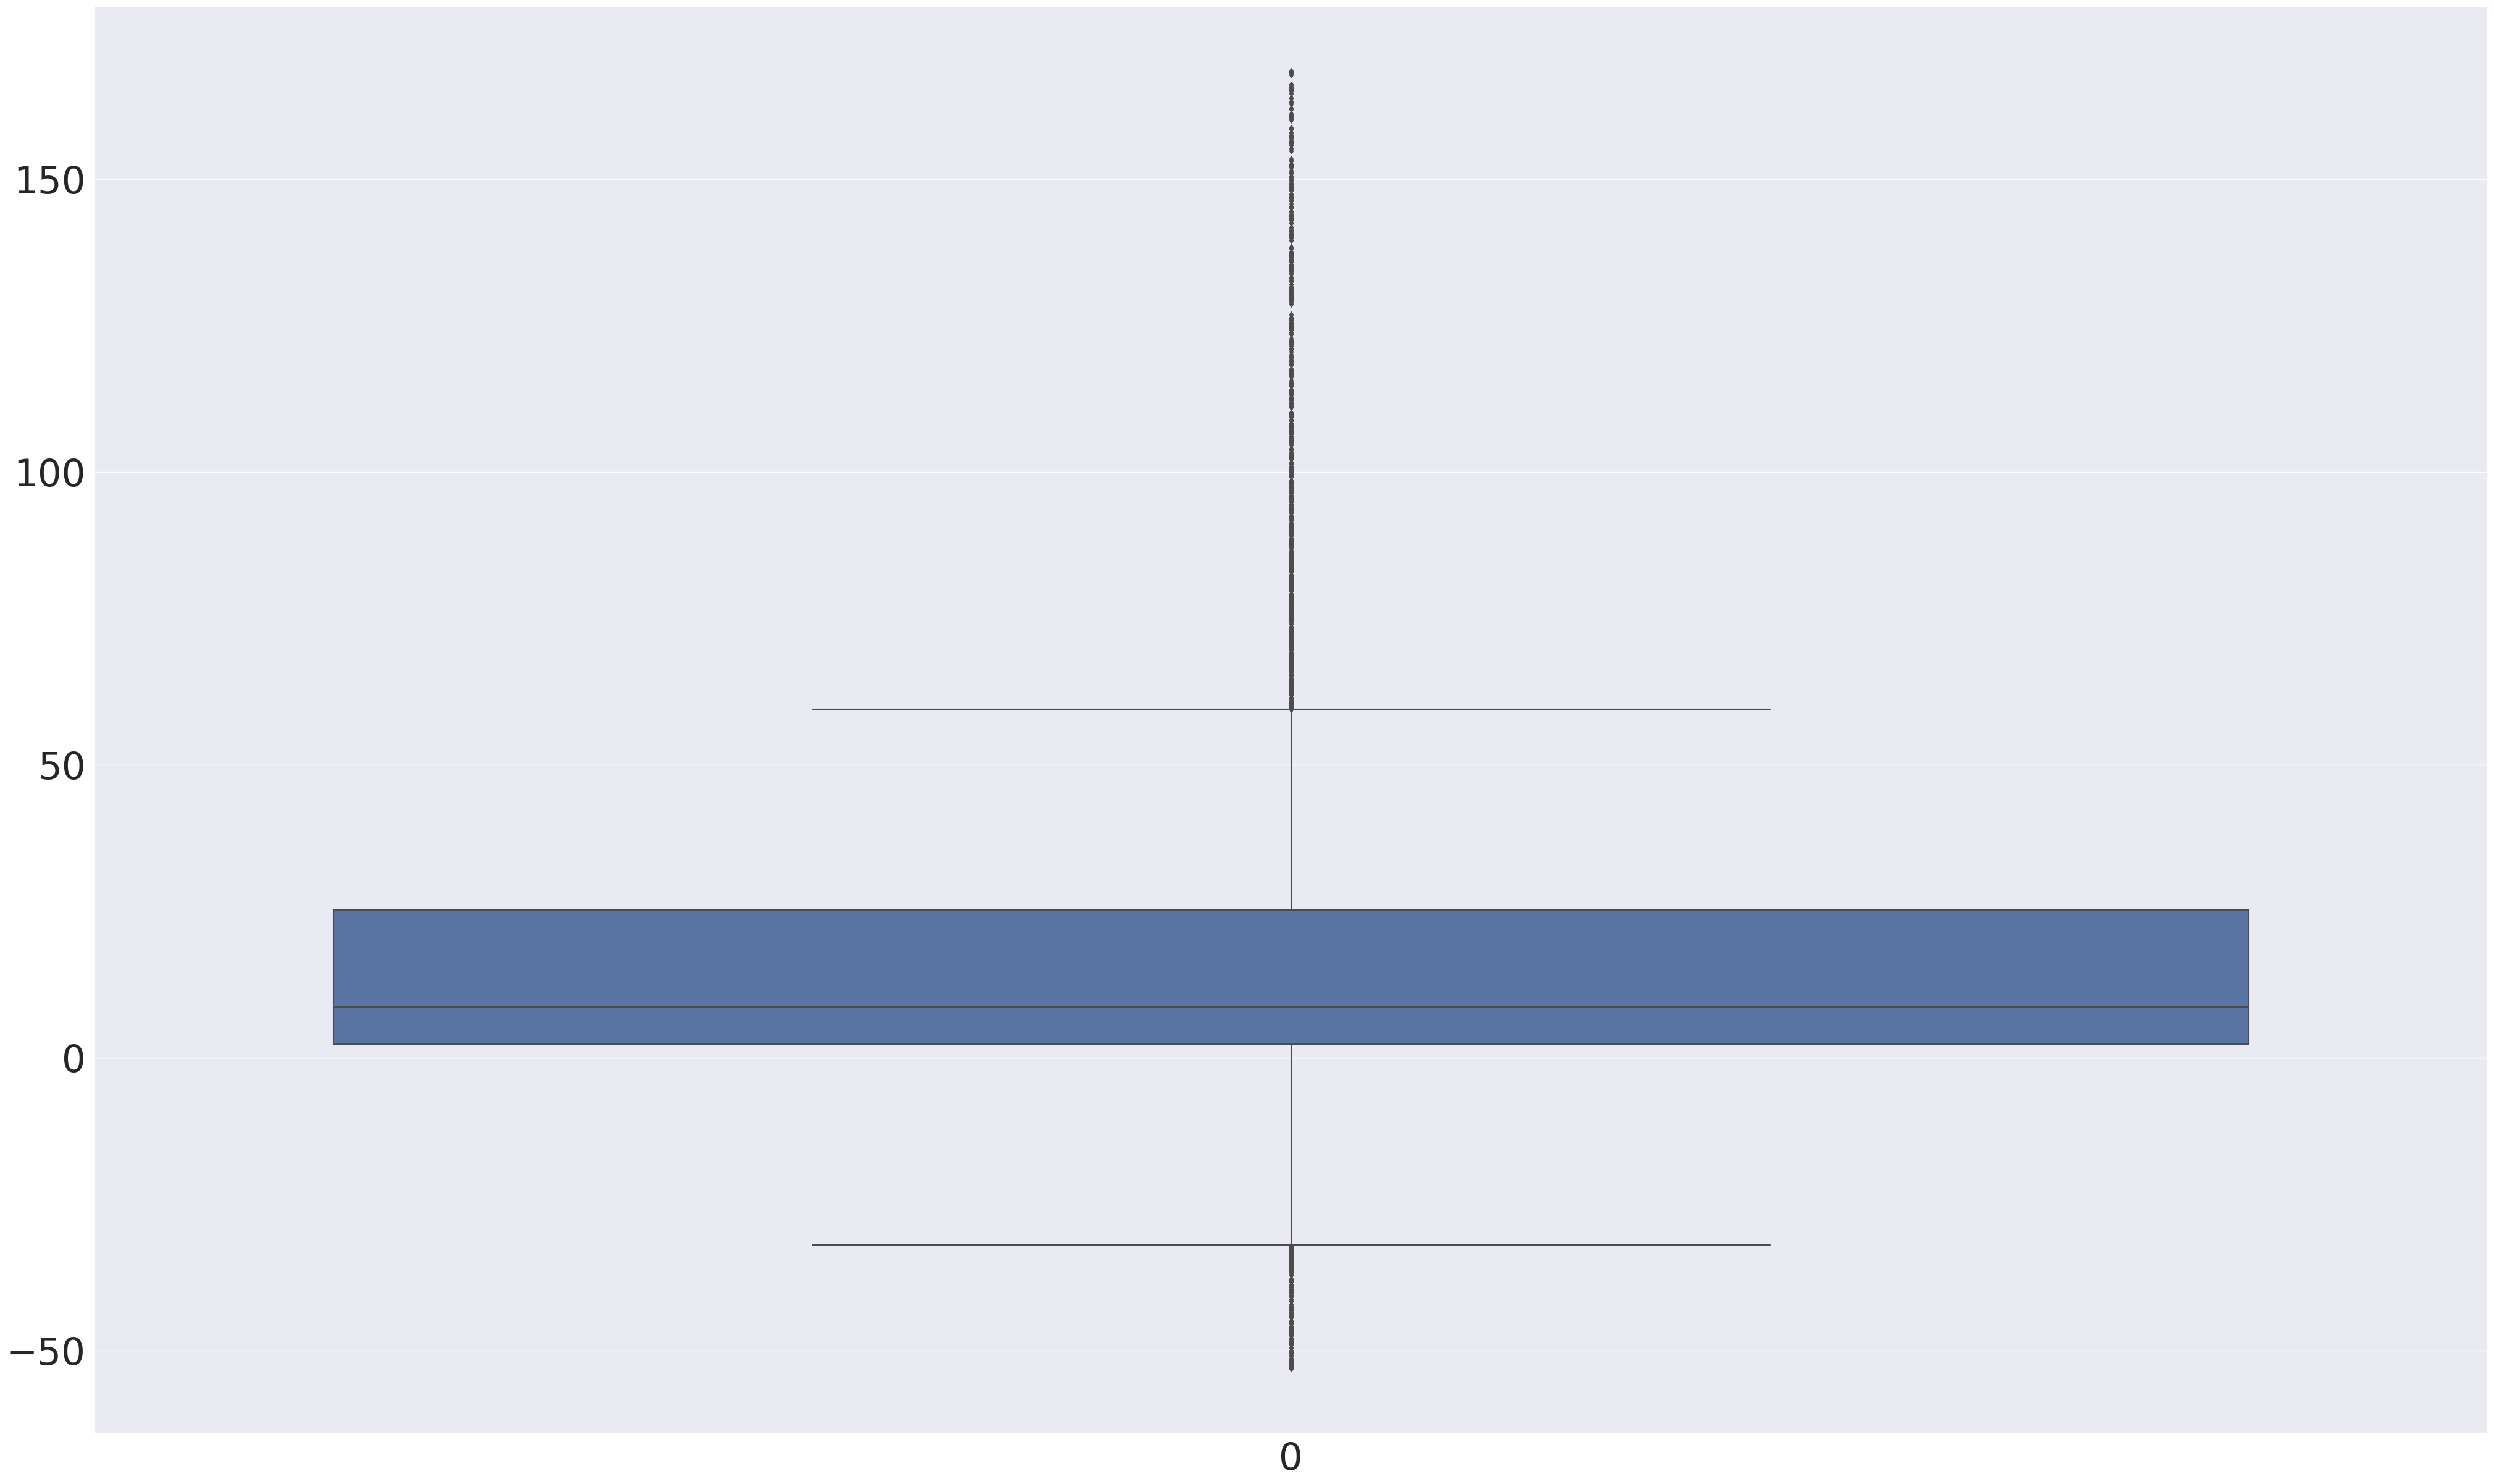

In [56]:
sns.boxplot(new_df['Profit'])      #Outliers have been removed

##Prediction Models

### Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [58]:
new_df.head()

,Ship Mode,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,Art,7.280,4,0.0,1.9656


In [59]:
dataset = new_df
y=dataset.iloc[:,-1:].values
x=dataset.iloc[:,:-1].values     #Splitting the data into dependent and independent
                                 #variables for x and y respectively

In [60]:
x  #independent variables

array([['Second Class', 'Consumer', 'Bookcases', 261.96, 2, 0.0],
       ['Second Class', 'Corporate', 'Labels', 14.62, 2, 0.0],
       ['Standard Class', 'Consumer', 'Storage', 22.368, 2, 0.2],
       ...,
       ['Standard Class', 'Consumer', 'Phones', 258.576, 2, 0.2],
       ['Standard Class', 'Consumer', 'Paper', 29.6, 4, 0.0],
       ['Second Class', 'Consumer', 'Appliances', 243.16, 2, 0.0]],
      dtype=object)

In [61]:
y  #dependent variables

array([[41.9136],
       [ 6.8714],
       [ 2.5164],
       ...,
       [19.3932],
       [13.32  ],
       [72.948 ]])

In [62]:
def encode(arr):
    '''Applying labelencoding to the columns which have categorical values'''
    for p in arr:
        from sklearn.preprocessing import LabelEncoder,OneHotEncoder
        labelencoder_x=LabelEncoder()
        x[:,p]=labelencoder_x.fit_transform(x[:,p])
arr=[0,1,2]
encode(arr)

In [63]:
g=pd.DataFrame(x)     #Changing labelencoded numpyarray into dataframe

In [64]:
g

,0,1,2,3,4,5
0,2,0,4,261.96,2,0.0
1,2,1,10,14.62,2,0.0
2,3,0,14,22.368,2,0.2
3,3,0,9,48.86,7,0.0
4,3,0,2,7.28,4,0.0
...,...,...,...,...,...,...
8987,2,0,9,25.248,3,0.2
8988,3,0,9,91.96,2,0.0
8989,3,0,13,258.576,2,0.2
8990,3,0,12,29.6,4,0.0


#### Applying OneHotEncoding to labelencoded values

In [65]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))

In [66]:
x=x[:,1:]
x

array([[0.0, 1.0, 0.0, ..., 261.96, 2, 0.0],
       [0.0, 1.0, 0.0, ..., 14.62, 2, 0.0],
       [0.0, 0.0, 1.0, ..., 22.368, 2, 0.2],
       ...,
       [0.0, 0.0, 1.0, ..., 258.576, 2, 0.2],
       [0.0, 0.0, 1.0, ..., 29.6, 4, 0.0],
       [0.0, 1.0, 0.0, ..., 243.16, 2, 0.0]], dtype=object)

In [67]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))

In [68]:
x=x[:,1:]
x

array([[0.0, 0.0, 0.0, ..., 261.96, 2, 0.0],
       [1.0, 0.0, 0.0, ..., 14.62, 2, 0.0],
       [0.0, 0.0, 0.0, ..., 22.368, 2, 0.2],
       ...,
       [0.0, 0.0, 0.0, ..., 258.576, 2, 0.2],
       [0.0, 0.0, 0.0, ..., 29.6, 4, 0.0],
       [0.0, 0.0, 0.0, ..., 243.16, 2, 0.0]], dtype=object)

In [69]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [5])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))

In [70]:
x=x[:,1:]
x

array([[0.0, 0.0, 0.0, ..., 261.96, 2, 0.0],
       [0.0, 0.0, 0.0, ..., 14.62, 2, 0.0],
       [0.0, 0.0, 0.0, ..., 22.368, 2, 0.2],
       ...,
       [0.0, 0.0, 0.0, ..., 258.576, 2, 0.2],
       [0.0, 0.0, 0.0, ..., 29.6, 4, 0.0],
       [1.0, 0.0, 0.0, ..., 243.16, 2, 0.0]], dtype=object)

In [71]:
g=pd.DataFrame(x)
g                     #Displaying dataframe after label and onehot encoding

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,261.96,2,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,14.62,2,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.368,2,0.2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.86,7,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.28,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25.248,3,0.2
8988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,91.96,2,0.0
8989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,258.576,2,0.2
8990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.6,4,0.0


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)    #splitting the data into training and testing data 10% for testing and 90% for training

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)      #Values which have been predicted by the model

In [73]:
y_pred

array([[ 1.66846502e+00],
       [ 2.51088339e+00],
       [ 3.65093549e+01],
       [ 1.78669851e+01],
       [ 1.16280046e+01],
       [ 3.01678770e+01],
       [ 3.22875979e+00],
       [ 1.26668212e+01],
       [ 2.72981465e+01],
       [ 9.21403275e+00],
       [-2.41491440e+01],
       [ 3.75824665e+01],
       [-2.04136627e+01],
       [ 2.92675557e+01],
       [-1.15953039e+01],
       [ 4.50749713e+01],
       [ 1.74052343e+01],
       [ 2.67880219e+01],
       [ 2.50958564e+01],
       [ 6.27873667e+01],
       [ 2.69844151e+01],
       [ 8.33680727e+00],
       [ 3.13221140e+01],
       [ 2.07962978e+01],
       [ 3.20862446e+01],
       [ 1.35927978e+01],
       [ 1.98127256e+01],
       [ 1.43381639e+00],
       [ 3.08117914e+01],
       [ 2.87663732e+01],
       [ 2.76298259e+01],
       [-2.87937618e+01],
       [ 1.09401401e+01],
       [ 2.52973024e+01],
       [ 2.44364454e+01],
       [ 5.11410269e+01],
       [ 1.47454383e+01],
       [-3.41711861e+00],
       [ 7.0

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)    #As the data is non-linear the error is very high, so we go for classification model

610.1106599467003

### KNN Algorithm

In [75]:
new1_df = df.copy(deep=True)

In [76]:
new1_df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Product Name', 'Order Month', 'Order Year', 'Order Day of Week', 'Ship Month', 'Ship Year', 'Ship Day of Week'], axis=1,inplace=True)

In [77]:
new1_df

,Ship Mode,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Paper,29.6000,4,0.00,13.3200


In [78]:
y=new1_df.iloc[:,-1:].values              #dependent variable = 'Profit'
x=new1_df.iloc[:,3:-1].values             #independent variable = 'Sales','Quantity','Discount' (as they affect profit the most)

In [79]:
y=np.where(y > 0, 1, np.where(y< 0, -1,0))       #If profit>0 change the value to 1  (profit)
p=pd.DataFrame(y)                                #If profit<0 change the value to -1  (loss)
p[0].value_counts()                              #If profit=0 change the value to 0   (neutral)

 1    8058
-1    1870
 0      65
Name: 0, dtype: int64

In [80]:
p=pd.DataFrame(x)
p

,0,1,2
0,261.9600,2.0,0.00
1,731.9400,3.0,0.00
2,14.6200,2.0,0.00
3,957.5775,5.0,0.45
4,22.3680,2.0,0.20
...,...,...,...
9988,25.2480,3.0,0.20
9989,91.9600,2.0,0.00
9990,258.5760,2.0,0.20
9991,29.6000,4.0,0.00


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [82]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()                               #applying feature scaling on independent variables
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(x_train,y_train.ravel())

KNeighborsClassifier()

In [84]:
y_pred=classifier.predict(x_test)           #predicted class by the model


In [85]:
y_pred

array([ 1,  1,  1, ..., -1,  1,  1])

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)                #confusion matrix to check accuracy of the model

In [87]:
cm                                                #confusion matrix

array([[ 372,    0,  104],
       [   4,    0,   14],
       [  44,    2, 1959]])

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9327731092436975

KNN gives an accuracy of 93.15%

### Logistic Regression

In [89]:
lr_df = new_df
y=dataset.iloc[:,-1:].values
x=dataset.iloc[:,3:5].values

In [90]:
y=np.where(y > 0, 1, np.where(y< 0, 0,0))
p=pd.DataFrame(y)
p[0].value_counts()

1    7557
0    1435
Name: 0, dtype: int64

In [91]:
p=pd.DataFrame(x)
p

,0,1
0,261.960,2.0
1,14.620,2.0
2,22.368,2.0
3,48.860,7.0
4,7.280,4.0
...,...,...
8987,25.248,3.0
8988,91.960,2.0
8989,258.576,2.0
8990,29.600,4.0


In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [93]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)


In [94]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=0)

In [95]:
y_pred=classifier.predict(x_test)


In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[   0,  344],
       [   0, 1904]])

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8469750889679716

Logistic Regression gives an accuracy of 84.69%

### Decision tree classification

In [98]:
new1_df = df.copy(deep=True)

In [99]:
new1_df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Product Name', 'Order Month', 'Order Year', 'Order Day of Week', 'Ship Month', 'Ship Year', 'Ship Day of Week'], axis=1,inplace=True)

In [100]:
new1_df

,Ship Mode,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Paper,29.6000,4,0.00,13.3200


In [101]:
y=new1_df.iloc[:,-1:].values
x=new1_df.iloc[:,3:-1].values

In [102]:
y=np.where(y > 0, 1, np.where(y< 0, -1,0))
p=pd.DataFrame(y)
p[0].value_counts()

 1    8058
-1    1870
 0      65
Name: 0, dtype: int64

In [103]:
p=pd.DataFrame(x)
p

,0,1,2
0,261.9600,2.0,0.00
1,731.9400,3.0,0.00
2,14.6200,2.0,0.00
3,957.5775,5.0,0.45
4,22.3680,2.0,0.20
...,...,...,...
9988,25.2480,3.0,0.20
9989,91.9600,2.0,0.00
9990,258.5760,2.0,0.20
9991,29.6000,4.0,0.00


In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [105]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [106]:
y_pred=classifier.predict(x_test)

In [107]:
y_pred

array([ 1,  1,  1, ..., -1,  1,  1])

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 398,    5,   73],
       [   4,    3,   11],
       [  86,    5, 1914]])

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9263705482192878

Decision Tree gives an acuuracy of 92.63%

### Random forest classification

In [110]:
new1_df = df.copy(deep=True)

In [111]:
new1_df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Product Name', 'Order Month', 'Order Year', 'Order Day of Week', 'Ship Month', 'Ship Year', 'Ship Day of Week'], axis=1,inplace=True)

In [112]:
new_df

,Ship Mode,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,Art,7.280,4,0.0,1.9656
...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Paper,29.600,4,0.0,13.3200


In [113]:
y=new1_df.iloc[:,-1:].values
x=new1_df.iloc[:,3:-1].values

In [114]:
y=np.where(y > 0, 1, np.where(y< 0, -1,0))
p=pd.DataFrame(y)
p[0].value_counts()

 1    8058
-1    1870
 0      65
Name: 0, dtype: int64

In [115]:
p=pd.DataFrame(x)
p

,0,1,2
0,261.9600,2.0,0.00
1,731.9400,3.0,0.00
2,14.6200,2.0,0.00
3,957.5775,5.0,0.45
4,22.3680,2.0,0.20
...,...,...,...
9988,25.2480,3.0,0.20
9989,91.9600,2.0,0.00
9990,258.5760,2.0,0.20
9991,29.6000,4.0,0.00


In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

<ipython-input-117-09fefa075adb>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [118]:
y_pred=classifier.predict(x_test)

In [119]:
y_pred

array([ 1,  1,  1, ..., -1,  1,  1])

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 394,    4,   78],
       [   3,    3,   12],
       [  79,    5, 1921]])

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9275710284113645

Random Forest gives an accuracy of 92.75%.

### Accuracies of all models

*   K nearest neighbours     93.15%
*   Logistic regression      84.69%
*   Decision tree            92.63%
*   Random forest            92.75%